In [1]:
import pandas as pd
import seaborn as sns

url = "https://drive.google.com/file/d/1m16P6OTR6HwDEnxIbwatcin73AsD40iw/view?usp=sharing" # ordlinesordmerged_qcd.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

ordlinesordmerged = pd.read_csv(path)

url = "https://drive.google.com/file/d/1mHogWDrc14E9f7dFMVfJfK4-8OqOeZ88/view?usp=sharing" # ordlines_cl.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

orderlines_cl = pd.read_csv(path)

url = "https://drive.google.com/file/d/1zr2ThmCQBLQfjaCOvXWpx3djWf3s0Ro-/view?usp=sharing" # orders_cl.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

orders_cl = pd.read_csv(path)

url = "https://drive.google.com/file/d/1ZjUKzOF_Y1TuHay4BlkDWf5wSerAqbJN/view?usp=sharing" # products_cl.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

products_cl = pd.read_csv(path)

url = "https://drive.google.com/file/d/1fKH36uOmHC0eGqX0MOvyn728CRo-XYWr/view?usp=sharing" # brands_cl.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

brands_cl = pd.read_csv(path)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_rows = 100

In [4]:
ordlines_df = orderlines_cl.copy()
products_df = products_cl.copy()

In [5]:

products_df.head(5)

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364


In [6]:
ordlines_df.head(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [7]:
products_df["sku"].nunique()

9992

In [8]:
ordlines_df["sku"].nunique()

6798

In [9]:
sku_merge = pd.merge(products_df,ordlines_df, on= "sku").drop(columns=["id","type","product_id"])
sku_merge

,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,date
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,300551,1,54.99,2017-01-02 13:34:30
1,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,304067,1,49.99,2017-01-07 09:02:08
2,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,304484,1,49.99,2017-01-07 21:17:55
3,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,305406,1,49.99,2017-01-09 07:45:12
4,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,305590,1,49.99,2017-01-09 11:53:15
...,...,...,...,...,...,...,...,...,...
209688,REP0076,repair Full screen iPad (1st generation),Repair service including parts and labor for iPad,149.99,0,355016,1,149.99,2017-05-11 18:30:11
209689,REP0076,repair Full screen iPad (1st generation),Repair service including parts and labor for iPad,149.99,0,365406,1,149.99,2017-06-13 22:37:38
209690,REP0076,repair Full screen iPad (1st generation),Repair service including parts and labor for iPad,149.99,0,409162,1,149.99,2017-10-06 00:32:29
209691,REP0076,repair Full screen iPad (1st generation),Repair service including parts and labor for iPad,149.99,0,512821,1,149.98,2018-02-16 12:11:38


In [10]:
 #### difference catalogue minus orderlines price
sku_merge["price_diff"] = sku_merge["unit_price"]-sku_merge["price"]
# sku_merge["price_diff"].nlargest(25)
#### how much higher is the catalogue price than the unit price from orderlines
sku_merge["%price_diff"] = (sku_merge["unit_price"]/sku_merge["price"]*100-100)
# sku_merge["%price_diff"].nsmallest(25)
sku_merge.sort_values("%price_diff")

,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,date,price_diff,%price_diff
86367,APP1465,Spanish Keyboard Keyboard Magic Apple Mac (OEM),Spanish Keyboard Mac and Apple iPad Ultrathin ...,119.00,1,365886,1,-119.00,2017-06-15 12:48:54,-238.00,-200.000000
27163,APP0735,Apple Thunderbolt Cable 0.5m White,Thunderbolt Cable 0.5m Apple Mac.,35.00,0,495131,1,0.00,2018-01-20 17:09:32,-35.00,-100.000000
181904,MAT0009,Matias Bluetooth keyboard Aluminum + Spanish n...,Aluminum Bluetooth keypad manages 4 devices si...,119.99,0,471130,1,0.00,2017-12-25 12:42:16,-119.99,-100.000000
181905,MAT0009,Matias Bluetooth keyboard Aluminum + Spanish n...,Aluminum Bluetooth keypad manages 4 devices si...,119.99,0,471131,1,0.00,2017-12-25 12:42:18,-119.99,-100.000000
181906,MAT0009,Matias Bluetooth keyboard Aluminum + Spanish n...,Aluminum Bluetooth keypad manages 4 devices si...,119.99,0,471132,1,0.00,2017-12-25 12:42:22,-119.99,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...
102204,IFX0074,iFixit piece Earpiece Speaker iPhone 6,Handset internal speaker for iPhone 6,7.99,1,388586,1,24.95,2017-08-11 09:29:25,16.96,212.265332
102200,IFX0074,iFixit piece Earpiece Speaker iPhone 6,Handset internal speaker for iPhone 6,7.99,1,331788,1,24.95,2017-03-03 23:11:45,16.96,212.265332
187871,SPE0206,Presidio Speck Case iPhone 8/7 / 6s / 6 Transp...,Protective cover with anti-impact polycarbonat...,24.95,0,462121,1,810.00,2017-12-13 19:07:31,785.05,3146.492986
116465,SHE0045,SwitchEasy iPhone Case 8 Plus 0.35 / 7 Plus White,Ultra Thin Case for iPhone 8 Plus / 7 Plus in ...,9.99,0,433952,1,377.03,2017-11-23 10:29:29,367.04,3674.074074


,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,date,price_diff,%price_diff
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,300551,1,54.99,2017-01-02 13:34:30,-5.00,-8.334722
9,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,310820,1,49.99,2017-01-17 09:37:43,-10.00,-16.669445
11,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,311042,1,49.99,2017-01-17 15:55:39,-10.00,-16.669445
13,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,320073,1,54.99,2017-02-05 11:28:30,-5.00,-8.334722
16,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,324568,1,54.99,2017-02-15 13:36:16,-5.00,-8.334722
...,...,...,...,...,...,...,...,...,...,...,...
209678,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,475426,1,19.54,2017-12-28 20:24:02,-10.45,-34.844948
209680,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,489741,2,22.99,2018-01-12 17:26:29,-7.00,-23.341114
209681,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,490325,2,22.99,2018-01-13 23:08:33,-7.00,-23.341114
209684,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,496812,1,22.99,2018-02-02 14:23:53,-7.00,-23.341114


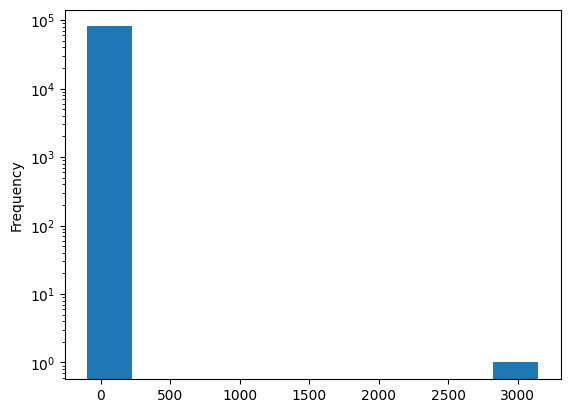

In [11]:
#### apply the "quality control" filter on this sku merge to filter for actually sold products
sku_good_merge = sku_merge.loc[sku_merge["id_order"].isin(ordlinesordmerged["order_id"])]
sku_good_merge.nsmallest(50,columns=["price_diff"])
# sku_good_merge["price_diff"].plot(kind="hist",logy=True)
sku_good_merge["%price_diff"].plot(kind="hist",logy=True)
sku_good_merge.sort_values("%price_diff")
sku_good_merge

In [12]:
#### Removing outliers via IQR
Q1 = sku_good_merge["price_diff"].quantile(0.25)
Q3 = sku_good_merge["price_diff"].quantile(0.75)
IQR = Q3-Q1
sku_good_merge_iqr = sku_good_merge.loc[(sku_good_merge["price_diff"] >= (Q1 - 1.5*IQR)) & (sku_good_merge["price_diff"] <= (Q3 + 1.5*IQR)), :]
sku_good_merge_iqr.sort_values("price_diff")
# print(f"Q1 {Q1}  Q3 {Q3} IQR {IQR}")

,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,date,price_diff,%price_diff
58170,SNN0050,Sonnet Echo Express SE Thunderbolt PCIe expans...,Thunderbolt chassis 2 PCIe expansion cards.,325.49,0,423282,1,257.99,2017-11-08 09:09:54,-67.50,-20.737964
104921,LIF0038-A,Open - LifeProof Fre Waterproof Case iPhone 6 ...,waterproof and extreme conditions for iPhone 6...,79.99,0,316622,1,12.54,2017-01-29 12:37:20,-67.45,-84.323040
14528,OWC0044,SSD expansion kit OWC Aura Pro 6G 480GB MacBoo...,480GB SSD expansion for MacBook Air 11-inch an...,386.99,0,506141,1,319.58,2018-02-05 11:34:26,-67.41,-17.419055
14527,OWC0044,SSD expansion kit OWC Aura Pro 6G 480GB MacBoo...,480GB SSD expansion for MacBook Air 11-inch an...,386.99,0,498560,1,319.58,2018-01-25 18:16:09,-67.41,-17.419055
33006,APP0911,Apple Mac mini Core i5 26GHz | 16GB RAM | 1TB HDD,PC Mac mini Core i5 26GHz 16GB 1TB (MGEN2YP / A).,1039.00,0,470358,1,971.59,2017-12-23 18:18:03,-67.41,-6.487969
...,...,...,...,...,...,...,...,...,...,...,...
146210,BNQ0053,"PD2700Q Monitor Benq 27 ""QHD 10bit HDMI pivotable",2K monitor 27 for design professionals sRGB 10...,337.00,0,460744,2,367.90,2017-12-12 14:00:39,30.90,9.169139
112620,LAC0195,LaCie 2big Quadra USB 3.0 FW800 RAID 10TB,And ultra-fast RAID External Hard Drive 10TB s...,579.00,0,303776,1,609.99,2017-01-06 19:55:28,30.99,5.352332
167165,DLL0052,"Dell Monitor S2718D 27 ""ultrathin HDR-C 45W US...",Monitor 238 inches QHD sRGB 99% pivotable and ...,580.99,0,416507,1,612.99,2017-10-23 23:03:05,32.00,5.507840
146213,BNQ0053,"PD2700Q Monitor Benq 27 ""QHD 10bit HDMI pivotable",2K monitor 27 for design professionals sRGB 10...,337.00,0,464158,1,369.00,2017-12-15 23:17:01,32.00,9.495549


sku                 2021
name                2021
desc                2021
price               2021
in_stock            2021
id_order            2021
product_quantity    2021
unit_price          2021
date                2021
price_diff          2021
%price_diff         2021
dtype: int64

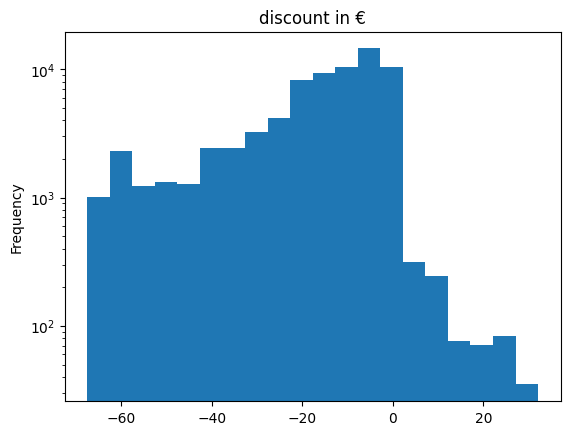

In [13]:
sku_good_merge_iqr["price_diff"].plot(kind="hist", logy=True, bins=20, title="discount in €");
sku_good_merge_iqr.loc[sku_good_merge_iqr["price_diff"]>0,].count()

In [14]:
sku_good_merge_iqr = sku_good_merge_iqr.loc[sku_good_merge_iqr["price_diff"]<0,]

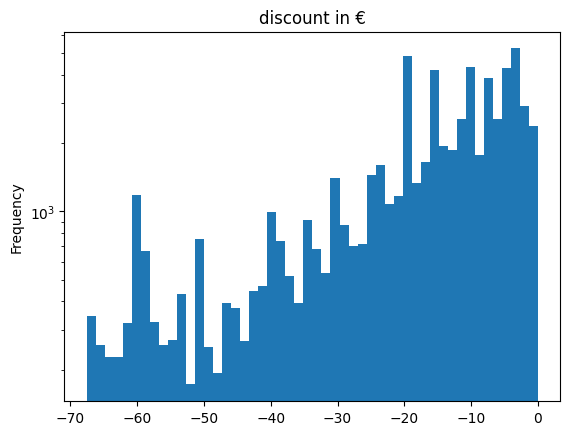

In [15]:
sku_good_merge_iqr["price_diff"].plot(kind="hist", logy=True, bins=50, title="discount in €");

In [16]:
sku_good_merge_iqr["date"] = pd.to_datetime(sku_good_merge_iqr["date"])
sku_good_merge_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67359 entries, 0 to 209685
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sku               67359 non-null  object        
 1   name              67359 non-null  object        
 2   desc              67359 non-null  object        
 3   price             67359 non-null  float64       
 4   in_stock          67359 non-null  int64         
 5   id_order          67359 non-null  int64         
 6   product_quantity  67359 non-null  int64         
 7   unit_price        67359 non-null  float64       
 8   date              67359 non-null  datetime64[ns]
 9   price_diff        67359 non-null  float64       
 10  %price_diff       67359 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 6.2+ MB


In [17]:
sku_good_merge_iqr.set_index('date', inplace=True)

In [18]:
sku_good_merge_iqr

,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,price_diff,%price_diff
date,,,,,,,,,,
2017-01-02 13:34:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,300551,1,54.99,-5.00,-8.334722
2017-01-17 09:37:43,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,310820,1,49.99,-10.00,-16.669445
2017-01-17 15:55:39,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,311042,1,49.99,-10.00,-16.669445
2017-02-05 11:28:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,320073,1,54.99,-5.00,-8.334722
2017-02-15 13:36:16,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,324568,1,54.99,-5.00,-8.334722
...,...,...,...,...,...,...,...,...,...,...
2017-12-28 20:24:02,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,475426,1,19.54,-10.45,-34.844948
2018-01-12 17:26:29,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,489741,2,22.99,-7.00,-23.341114
2018-01-13 23:08:33,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,490325,2,22.99,-7.00,-23.341114


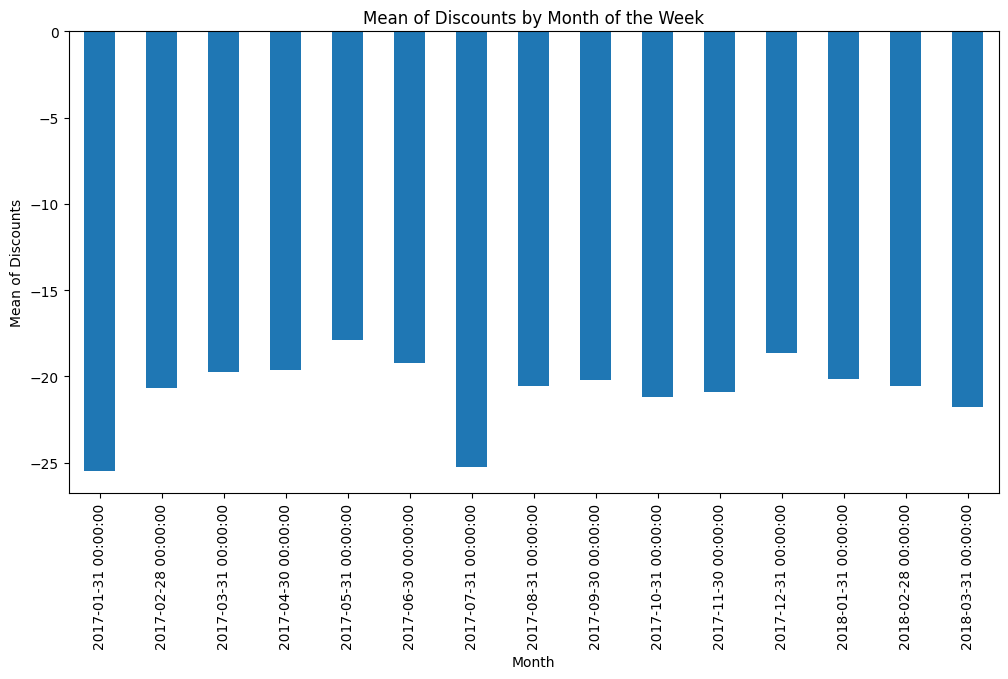

In [19]:
chart = (
    sku_good_merge_iqr['%price_diff']
    .resample('M')
    .mean()
    # .sort_values(ascending=False)
    .plot(
        kind='bar',
        figsize=(12, 6),
        title='Mean of Discounts by Month of the Week',
        # rot=45,
        xlabel='Month',
        ylabel='Mean of Discounts'
    )
)

chart.figure.show()

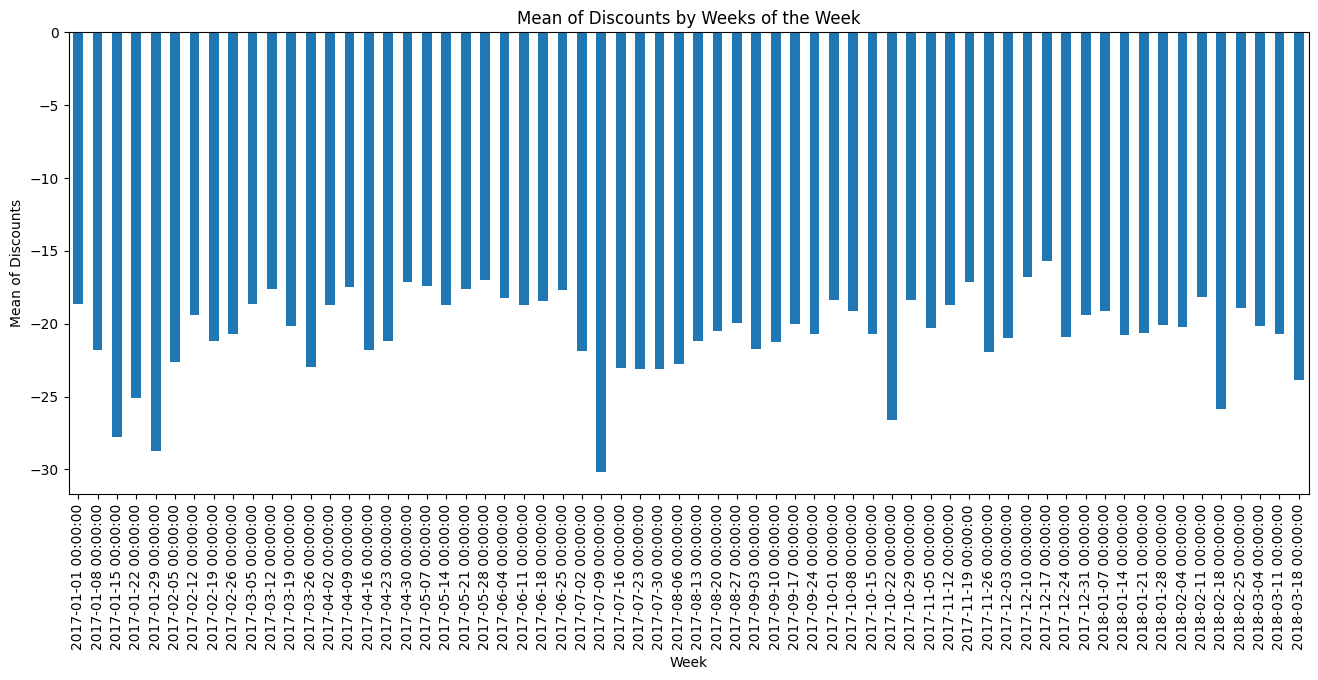

In [20]:
chart = (
    sku_good_merge_iqr['%price_diff']
    .resample('W')
    .mean()
    # .sort_values(ascending=False)
    .plot(
        kind='bar',
        figsize=(16, 6),
        title='Mean of Discounts by Weeks of the Week',
        # rot=45,
        xlabel='Week',
        ylabel='Mean of Discounts'
    )
)

chart.figure.show()

In [21]:
ordlines_rev = ordlines_df.copy()

In [22]:
ordlines_rev['revenue'] = ordlines_rev['unit_price']*ordlines_rev['product_quantity']
ordlines_rev['date'] = pd.to_datetime(ordlines_rev['date'])
ordlines_rev.sample(1)
sku_good_merge_iqr["revenue"] = sku_good_merge_iqr["product_quantity"]*sku_good_merge_iqr["unit_price"]  # adding revenue

# Revenue by Brand quarterly top 5

In [23]:
sku_good_merge_iqr = sku_good_merge_iqr.reset_index() #reset datetime from index
sku_good_merge_iqr

,date,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,price_diff,%price_diff,revenue
0,2017-01-02 13:34:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,300551,1,54.99,-5.00,-8.334722,54.99
1,2017-01-17 09:37:43,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,310820,1,49.99,-10.00,-16.669445,49.99
2,2017-01-17 15:55:39,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,311042,1,49.99,-10.00,-16.669445,49.99
3,2017-02-05 11:28:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,320073,1,54.99,-5.00,-8.334722,54.99
4,2017-02-15 13:36:16,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,324568,1,54.99,-5.00,-8.334722,54.99
...,...,...,...,...,...,...,...,...,...,...,...,...
67354,2017-12-28 20:24:02,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,475426,1,19.54,-10.45,-34.844948,19.54
67355,2018-01-12 17:26:29,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,489741,2,22.99,-7.00,-23.341114,45.98
67356,2018-01-13 23:08:33,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,490325,2,22.99,-7.00,-23.341114,45.98
67357,2018-02-02 14:23:53,MMW0015,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",Avoid shock and damage to your MacBook Pro 13-...,29.99,1,496812,1,22.99,-7.00,-23.341114,22.99


In [24]:

brand_rev_df = sku_good_merge_iqr.merge(brands_cl,left_on=sku_good_merge_iqr["sku"].str[:3], right_on="short").drop(columns="short") #merging brand name onto our "actual sold products df"
brand_rev_df

,date,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,price_diff,%price_diff,revenue,long
0,2017-01-02 13:34:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,300551,1,54.99,-5.0,-8.334722,54.99,Rain Design
1,2017-01-17 09:37:43,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,310820,1,49.99,-10.0,-16.669445,49.99,Rain Design
2,2017-01-17 15:55:39,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,311042,1,49.99,-10.0,-16.669445,49.99,Rain Design
3,2017-02-05 11:28:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,320073,1,54.99,-5.0,-8.334722,54.99,Rain Design
4,2017-02-15 13:36:16,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,324568,1,54.99,-5.0,-8.334722,54.99,Rain Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67314,2018-03-09 09:48:18,QAR0007,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,523660,1,79.99,-50.0,-38.464497,79.99,Qardio
67315,2018-03-09 11:19:26,QAR0007,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,523717,1,79.99,-50.0,-38.464497,79.99,Qardio
67316,2018-03-09 20:18:27,QAR0007,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,524124,1,79.99,-50.0,-38.464497,79.99,Qardio
67317,2018-03-11 11:41:19,QAR0007,Qardio Arm Voltage Meter iPhone White,Wireless sphygmomanometer for iPhone iPad and ...,129.99,1,525381,1,79.99,-50.0,-38.464497,79.99,Qardio


# ugly


In [ ]:
brand_rev_df["revenue"] = brand_rev_df["product_quantity"]*brand_rev_df["unit_price"]  # adding revenue
brand_rev_data = (brand_rev_df
    .groupby([brand_rev_df["date"].dt.to_period("Q"),"long"])
    .agg({"revenue":"sum", "%price_diff":"mean","price_diff":"mean","product_quantity":"sum"})).nlargest(5, columns="revenue") # daily_spending_per_order = daily_spending_per_order.groupby(level=0).mean()

brand_rev_data

brand_rev_df["revenue"] = brand_rev_df["product_quantity"]*brand_rev_df["unit_price"]  # adding revenue
rev_data = (brand_rev_df
    .groupby(brand_rev_df["date"].dt.to_period("Q"))
    .agg({"revenue":"sum", "%price_diff":"mean","price_diff":"mean","product_quantity":"sum"})).reset_index()#.nlargest(5, columns="revenue") # daily_spending_per_order = daily_spending_per_order.groupby(level=0).mean()

rev_data['date'] = rev_data['date'].astype('str')
rev_data
create_plot(rev_data,'quarterrev', clean=True)


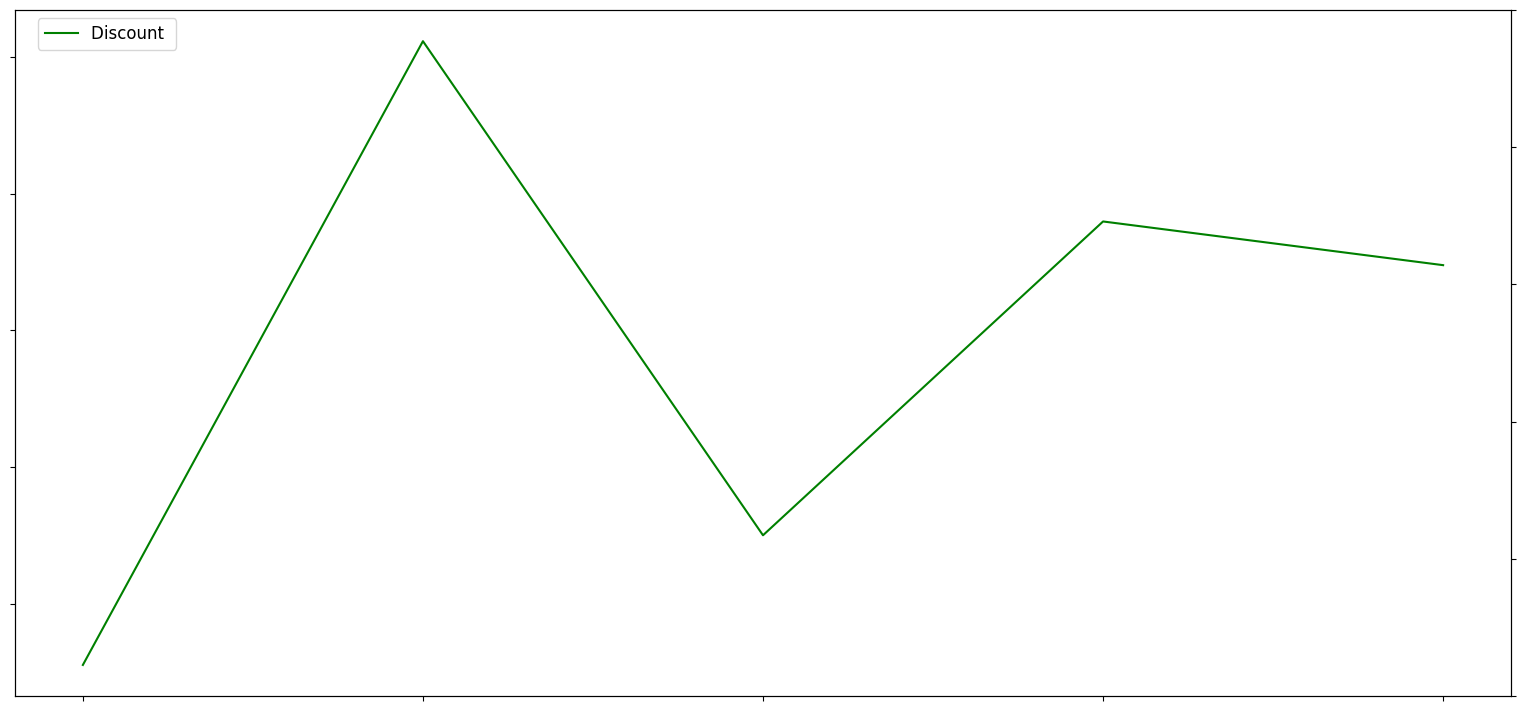

In [112]:
create_plot(rev_data,'onlydisc', clean=True)

In [26]:
# brand_rev_df["revenue"] = brand_rev_df["product_quantity"]*brand_rev_df["unit_price"]  # adding revenue
# (brand_rev_df
#     .groupby([brand_rev_df["date"].dt.to_period("Q"),"long"])
#     .agg({"revenue":"sum", "%price_diff":"mean","price_diff":"mean","product_quantity":"sum"})).sort_values("")

# Assume brand_rev_df is your DataFrame
# Group by quarter and brand, and calculate the aggregation
quarterly_brand_revenue = (brand_rev_df
    .groupby([brand_rev_df["date"].dt.to_period("Q"), "long"])
    .agg({"revenue": "sum", "%price_diff": "mean", "price_diff": "mean", "product_quantity": "sum"}))

# Function that returns the top 5 sales of a group
def top5_brands(group):
    return group.nlargest(5, 'revenue')#[1:5]

# Apply the function to each group
top5_quarterly_brands = quarterly_brand_revenue.groupby(level=0).apply(top5_brands)

# Since 'apply' retains the grouping keys, we want to reset the index so that the display is clearer
top5_quarterly_brands.reset_index(level=0, drop=True, inplace=True)

top5_quarterly_brands.info()
top5_quarterly_brands = top5_quarterly_brands.reset_index()
top5_quarterly_brands.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25 entries, (Period('2017Q1', 'Q-DEC'), 'Apple') to (Period('2018Q1', 'Q-DEC'), 'Western Digital')
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue           25 non-null     float64
 1   %price_diff       25 non-null     float64
 2   price_diff        25 non-null     float64
 3   product_quantity  25 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype        
---  ------            --------------  -----        
 0   date              25 non-null     period[Q-DEC]
 1   long              25 non-null     object       
 2   revenue           25 non-null     float64      
 3   %price_diff       25 non-null     float64      
 4   price_diff        25 non-null     float64      
 5   product_

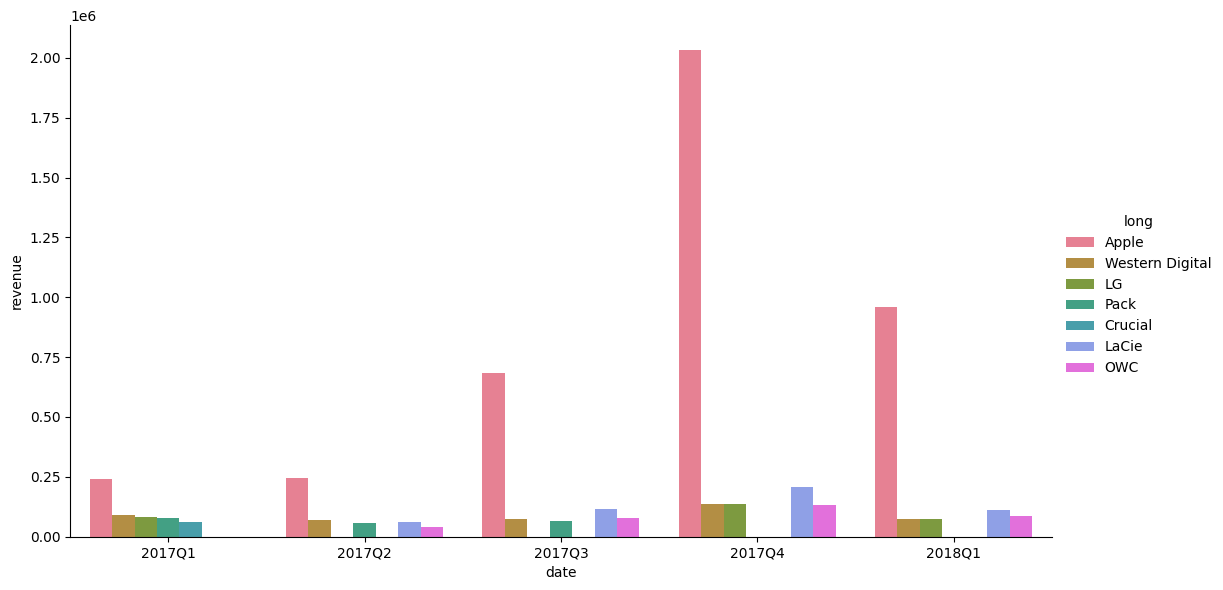

In [27]:
#top5_quarterly_brands["date"]=top5_quarterly_brands["date"].to_timestamp()
# plot = sns.lineplot(data = top5_quarterly_brands)

# # Create a figure and a set of subplots
# fig, ax1 = plt.subplots(figsize=(16, 8))  # Control the size through figsize

# # Plot on the first axis
# sns.lineplot(data=grouped_revenue, x='week-year', y='revenue', ax=ax1, color='b', label='Total Revenue')
# ax1.set_xlabel('Weeks')  # Label for the x-axis
# ax1.set_ylabel('Total Revenue', color='b')  # Label for the y-axis
# ax1.tick_params(axis='y', labelcolor='b')  # Tick parameters for y-axis
# for label in ax1.get_xticklabels():  # Rotate X-tick labels
#     label.set_rotation(90)

# # Creating a twin of the first axis to share the same x-axis
# ax2 = ax1.twinx()
# sns.lineplot(data=discounts_weekly, x='week-year', y='%price_diff', ax=ax2, color='r', label='Average Discount [%]')
# ax2.set_ylabel('Average Discount [%]', color='r')  # Label for the y-axis of the second plot
# ax2.tick_params(axis='y', labelcolor='r')  # Tick parameters for the second y-axis

# # Before creating a new combined legend, remove the existing legends
# ax1.legend().remove()
# ax2.legend().remove()

# # Creating a combined legend for both line plots
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.87,1))  # Position legend outside the plot

# # Title and layout adjustments
# fig.suptitle('Total Revenue and Price Difference per Week', fontsize=16)
# fig.tight_layout()  # Adjust layout to fit everything nicely

# # Show the plot
# plt.show()
plot = sns.catplot( data= top5_quarterly_brands, kind="bar", y="revenue", hue="long", x="date", palette="husl", height=6, aspect=1.8)

In [28]:
brand_rev_df.groupby("long").agg({"revenue":"sum", "%price_diff":"mean","price_diff":"mean","product_quantity":"sum"}).nlargest(5, columns="revenue")
brand_rev_df["revenue"] = brand_rev_df["product_quantity"]*brand_rev_df["unit_price"]  # adding revenue

In [29]:
ordlines_rev = ordlines_rev.merge(brands_cl, left_on=ordlines_rev['sku'].str[:3], right_on='short').drop(columns='short', axis=1)
ordlines_rev

,id,id_order,product_id,product_quantity,sku,unit_price,date,revenue,long
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox
1,1119236,299603,0,1,OTT0133,18.99,2017-01-01 10:18:53,18.99,Otterbox
2,1119383,299633,0,1,OTT0139,21.84,2017-01-01 12:41:52,21.84,Otterbox
3,1119506,299719,0,1,OTT0139,21.84,2017-01-01 14:19:14,21.84,Otterbox
4,1119738,299856,0,1,OTT0159,14.24,2017-01-01 18:34:12,14.24,Otterbox
...,...,...,...,...,...,...,...,...,...
215973,1642236,524124,0,1,QAR0007,79.99,2018-03-09 20:18:27,79.99,Qardio
215974,1644326,524783,0,1,QAR0007,79.99,2018-03-10 11:34:42,79.99,Qardio
215975,1645994,525381,0,1,QAR0007,79.99,2018-03-11 11:41:19,79.99,Qardio
215976,1647707,525534,0,1,QAR0007,79.99,2018-03-12 22:50:06,79.99,Qardio


In [ ]:
grouped_revenue = (ordlines_rev.groupby([ordlines_rev['date'].dt.isocalendar().year,
                                        ordlines_rev['date'].dt.isocalendar().week])['revenue']
                   .sum().reset_index())
grouped_revenue.drop(0, axis=0, inplace=True)
grouped_revenue['week-year'] = grouped_revenue['year'].astype(str) + "-" + grouped_revenue['week'].astype(str)
grouped_revenue

In [31]:
sku_good_merge_iqr = sku_good_merge_iqr.reset_index()
sku_good_merge_iqr.sample(10)

,index,date,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,price_diff,%price_diff,revenue
59604,59604,2017-09-23 10:04:19,SPE0206,Presidio Speck Case iPhone 8/7 / 6s / 6 Transp...,Protective cover with anti-impact polycarbonat...,24.95,0,403546,1,19.99,-4.96,-19.879760,19.99
30525,30525,2017-05-02 11:14:14,LAC0181,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.99,1,351765,1,126.99,-8.00,-5.926365,126.99
53039,53039,2017-05-11 10:01:58,GRT0463,Griffin Survivor Case for iPhone Journey 7 Cor...,Cast and impact resistant padded case for iPho...,29.99,0,354766,1,9.99,-20.00,-66.688896,9.99
27385,27385,2017-09-28 12:54:03,LGE0036,"25UM58-P Monitor LG 25 ""widescreen IPS UHD Ultra",Monitor 25-inch UHD IPS cinema format.,199.00,1,405802,1,168.99,-30.01,-15.080402,168.99
41065,41065,2017-02-28 21:30:16,APP1721,Apple Watch Series 2 Aluminum 42mm Rose Gold C...,Apple Watch 42 mm dual core processor with GPS...,469.00,0,330615,1,454.99,-14.01,-2.987207,454.99
5535,5535,2018-02-14 19:24:54,NTE0031,NewerTech Adapter Mini Display Port to DVI,Adapter mini Display Port to DVI.,29.99,0,464059,1,12.39,-17.60,-58.686229,12.39
28222,28222,2017-01-20 08:30:10,GRT0411,Griffin Survivor Summit Resistant Case iPhone ...,Rigid housing with protective screen and clip ...,44.99,0,312334,1,29.99,-15.00,-33.340742,29.99
36056,36056,2017-05-15 13:42:32,CRU0053,Disk 1TB SSD Crucial MX300,1050GB SSD Hard Drive SATA 3.0 (6Gb / s) for M...,293.34,1,355956,1,284.99,-8.35,-2.846526,284.99
9484,9484,2017-01-30 19:12:16,CRU0016-2,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,1,317722,1,80.74,-27.24,-25.226894,80.74
5534,5534,2018-02-06 18:32:07,NTE0031,NewerTech Adapter Mini Display Port to DVI,Adapter mini Display Port to DVI.,29.99,0,506988,1,12.39,-17.60,-58.686229,12.39


In [ ]:
# discounts_weekly = sku_good_merge_iqr['%price_diff'].resample('W').mean()
discounts_weekly = sku_good_merge_iqr.groupby([sku_good_merge_iqr['date'].dt.isocalendar().year,
                                        sku_good_merge_iqr['date'].dt.isocalendar().week])['%price_diff'].mean().reset_index()
discounts_weekly['%price_diff'] = discounts_weekly['%price_diff'] * (-1)
discounts_weekly.drop(0, axis=0, inplace=True)
discounts_weekly['week-year'] = discounts_weekly['year'].astype(str) + "-" + discounts_weekly['week'].astype(str)
discounts_weekly

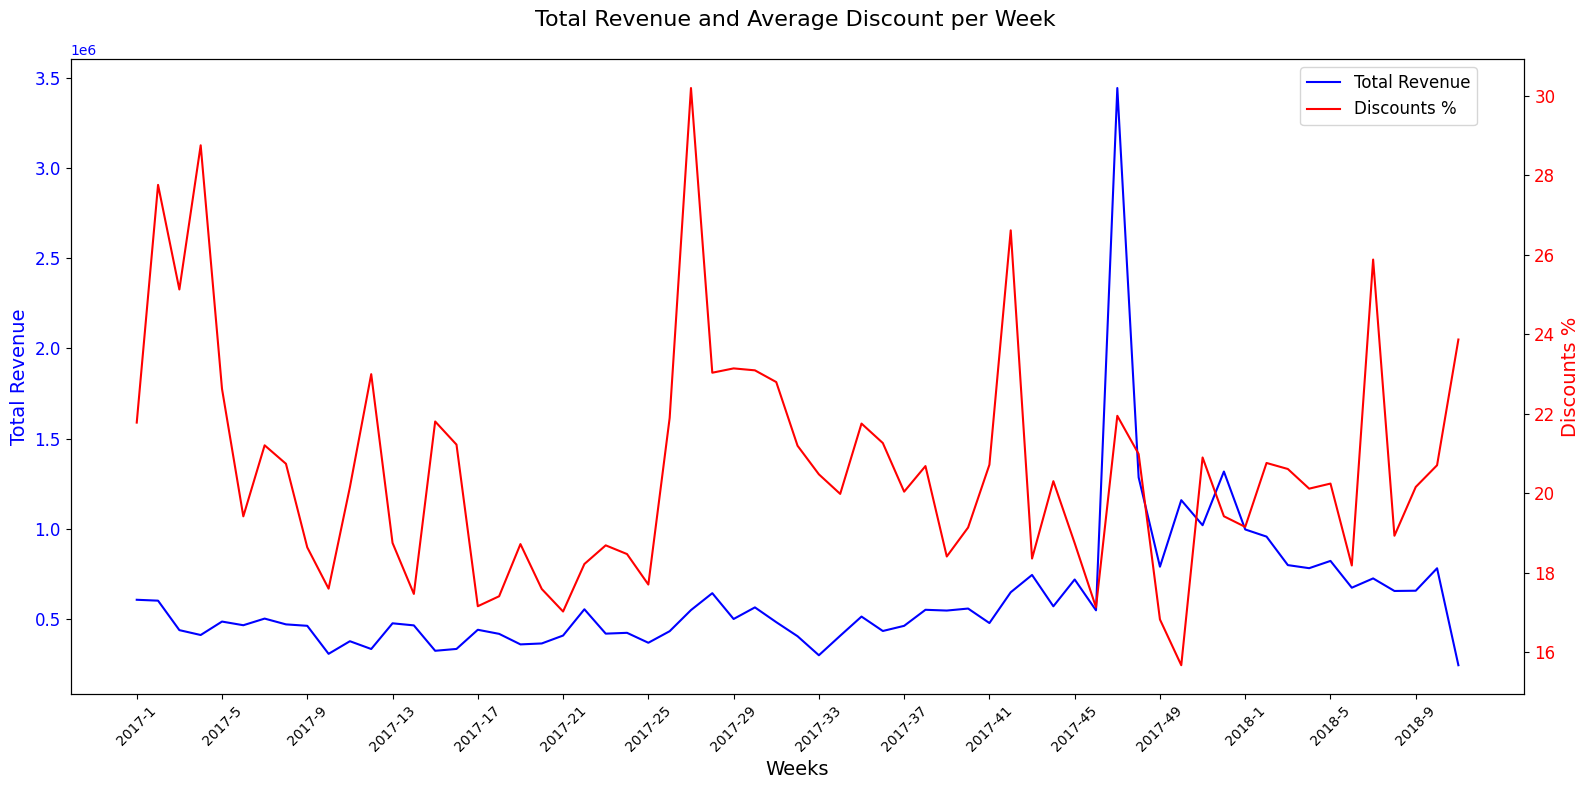

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 8))  # Control the size through figsize

# Plot on the first axis
sns.lineplot(data=grouped_revenue, x='week-year', y='revenue', ax=ax1, color='b', label='Total Revenue')
ax1.set_xlabel('Weeks', fontsize=14)  # Label for the x-axis
ax1.set_ylabel('Total Revenue', color='b', fontsize=14)  # Label for the y-axis
ax1.tick_params(axis='y', labelcolor='b', labelsize=12)  # Tick parameters for y-axis
for label in ax1.get_xticklabels():  # Rotate X-tick labels
    label.set_rotation(45)
ax1.grid(False)  # Disable the grid
ax1.set_xticks(ax1.get_xticks()[::2])

# Creating a twin of the first axis to share the same x-axis
ax2 = ax1.twinx()
sns.lineplot(data=discounts_weekly, x='week-year', y='%price_diff', ax=ax2, color='r', label='Discounts %')
ax2.set_ylabel('Discounts %', color='r', fontsize=14)  # Label for the y-axis of the second plot
ax2.tick_params(axis='y', labelcolor='r', labelsize=12)  # Tick parameters for the second y-axis
ax2.grid(False)  # Disable the grid for the second axis
ax2.set_xticks(ax2.get_xticks()[::2])

# Before creating a new combined legend, remove the existing legends
ax1.legend().remove()
ax2.legend().remove()

# Creating a combined legend for both line plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.84,1), fontsize=12)  # Position legend outside the plot

# Title and layout adjustments
fig.suptitle('Total Revenue and Average Discount per Week', fontsize=16)
fig.tight_layout()  # Adjust layout to fit everything nicely

# Show the plot
plt.show()

#Discount analysis for 3 brands with a rise and 3 brands with a decline in revenue

In [111]:
def create_plot(df, mode, title="", clean=False, q_df_name=None):
    fig, ax1 = plt.subplots(figsize=(16, 8))

    # Erster Plot
    if mode == 'long':
        sns.lineplot(data=df, x='week-year', y='revenue', ax=ax1, color='b', label=f'Revenue ({df["long"].iloc[0]})')
    elif mode == 'category':
        sns.lineplot(data=df, x='week-year', y='revenue', ax=ax1, color='b', label=f'Revenue ({title})')
    elif mode == 'quantiles':
        sns.lineplot(data=df, x='week-year', y='revenue', ax=ax1, color='b', label=f'Revenue ({str(q_df_name)})')
    elif mode == 'products':
        sns.lineplot(data=df, x='week-year', y='product_quantity', ax=ax1, color='b', label=f'Sold Units ')
    elif mode == 'rev':
        sns.lineplot(data=df, x='week-year', y='revenue', ax=ax1, color='b', label=f'Revenue ')
    elif mode == 'quarterrev':
        sns.lineplot(data=df, x='date', y='revenue', ax=ax1, color='b', label=f'Revenue ')
        ax1.set_xlabel('Quarters', fontsize=14)
    elif mode == 'onlydisc':
        sns.lineplot(data=df, x='date', y='%price_diff', ax=ax1, color='green', label=f'Discount ')


    if not clean:
        ax1.set_xlabel('Weeks', fontsize=14)
        ax1.set_ylabel('Revenue', color='b', fontsize=14)
    else:
        ax1.set_xlabel('')
        ax1.set_ylabel('')

    ax1.grid(False)

    # Zweiter Plot
    ax2 = ax1.twinx()
    if mode == 'long':
        sns.lineplot(data=df, x='week-year', y='%price_diff', ax=ax2, color='r', label=f'Average Discount [%] ({df["long"].iloc[0]})')
    elif mode == 'category':
        sns.lineplot(data=df, x='week-year', y='%price_diff', ax=ax2, color='r', label=f'Average Discount [%] ({title})')
    elif mode == 'quantiles':
        sns.lineplot(data=df, x='week-year', y='%price_diff', ax=ax2, color='r', label=f'Average Discount [%] ({str(q_df_name)})')
    elif mode == 'products':
        sns.lineplot(data=df, x='week-year', y='%price_diff', ax=ax2, color='r', label=f'Average Discount [%]')
    elif mode == 'rev':
        sns.lineplot(data=df, x='week-year', y='%price_diff', ax=ax2, color='r', label=f'Average Discount [%]')
    elif mode == 'quarterrev':
        sns.lineplot(data=df, x='date', y='product_quantity', ax=ax2, color='r', label=f'Units Sold')



    ax2.grid(False)

    # Entferne bestehende Legenden
    ax1.legend().remove()
    ax2.legend().remove()

    # Kombinierte Legende
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01,1), fontsize=12)

    # Titel und Layoutanpassungen
    if not clean:
        if mode == 'long':
            fig.suptitle(str(df['long'].iloc[0]) + ': Revenue and Average Discount per Week', fontsize=20)
            ax2.set_ylabel('Average Discount [%]', color='r', fontsize=14)
        elif mode == 'category':
            fig.suptitle(str(title) + ': Revenue and Average Discount per Week', fontsize=20)
            ax2.set_ylabel('Average Discount [%]', color='r', fontsize=14)
        elif mode == 'products':
            fig.suptitle('Units Sold and Average Discount per Week', fontsize=20)
            ax2.set_ylabel('Average Discount [%]', color='r', fontsize=14)
        elif mode == 'rev':
            fig.suptitle('Units Sold and Average Discount per Week', fontsize=20)
            ax2.set_ylabel('Average Discount [%]', color='r', fontsize=14)
        elif mode == 'quarterrev':
            fig.suptitle('Revenue and Units Sold per Quarter', fontsize=20)
            ax2.set_ylabel('Units Sold', color='r', fontsize=14)
        elif mode == 'onlydisc':
            fig.suptitle('', fontsize=20)


        ax2.tick_params(axis='y', labelcolor='r', labelsize=12)
    else:
        if mode == 'quarterrev':
            fig.suptitle('Revenue and Units Sold per Quarter', fontsize=20)
            # ax2.set_ylabel('Units Sold', color='r', fontsize=14)
            ax1.set_xlabel('Quarters')
            ax1.set_xticklabels(df['date'],fontsize=14)
            ax2.set_ylabel('')
            ax1.set_yticklabels([])
            ax2.set_yticklabels([])
        else:

            fig.suptitle('')
            ax2.set_ylabel('')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax2.set_xticklabels([])
            ax2.set_yticklabels([])

    fig.tight_layout(rect=[0, 0.03, 0.96, 0.95])

In [35]:
brand_rev_data.reset_index(drop=True, inplace=True)
# brand_rev_data['date'] = brand_rev_data['date'].dt.to_timestamp()
brand_rev_data

,revenue,%price_diff,price_diff,product_quantity
0,2034685.97,-12.593420,-19.135801,6855
1,961285.91,-11.896767,-15.760353,3136
2,682014.99,-17.440691,-26.159150,3012
3,245081.69,-14.675045,-12.340309,1423
4,242179.04,-27.792101,-15.400673,2256


In [36]:
def gogogo(brand_name):
    discounts_weekly = brand_rev_df.loc[(brand_rev_df['long'] == str(brand_name))].groupby([brand_rev_df['date'].dt.isocalendar().year,
                                            brand_rev_df['date'].dt.isocalendar().week]).agg({'revenue': "sum", '%price_diff': "mean", 'long': 'first'}).reset_index()
    try:
        discounts_weekly.drop(0, axis=0, inplace=True)
    except KeyError:
        pass

    discounts_weekly['%price_diff'] = discounts_weekly['%price_diff'] * (-1)
    discounts_weekly['week-year'] = discounts_weekly['year'].astype(str) + "-" + discounts_weekly['week'].astype(str)
    # discounts_weekly.sample(3)
    return discounts_weekly

Brands that had overall revenue growth:

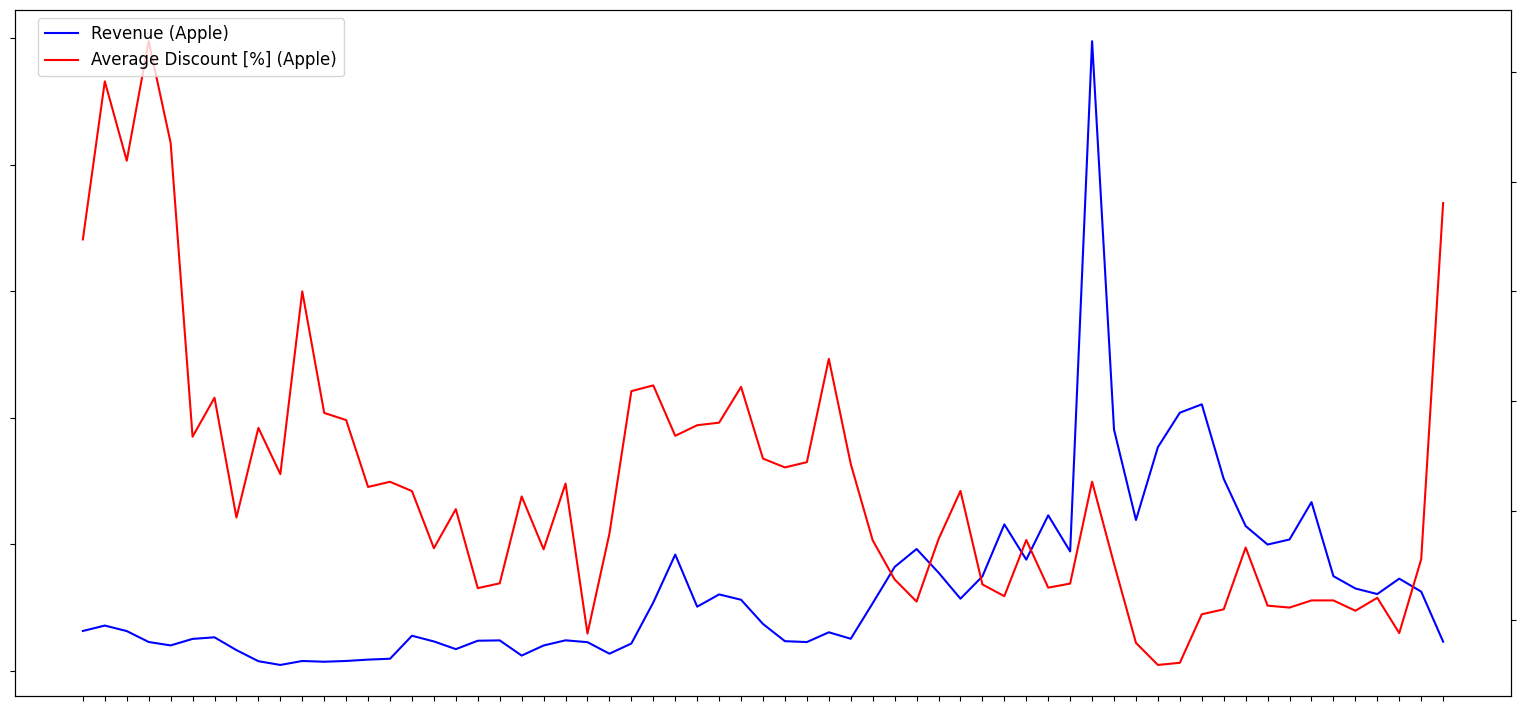

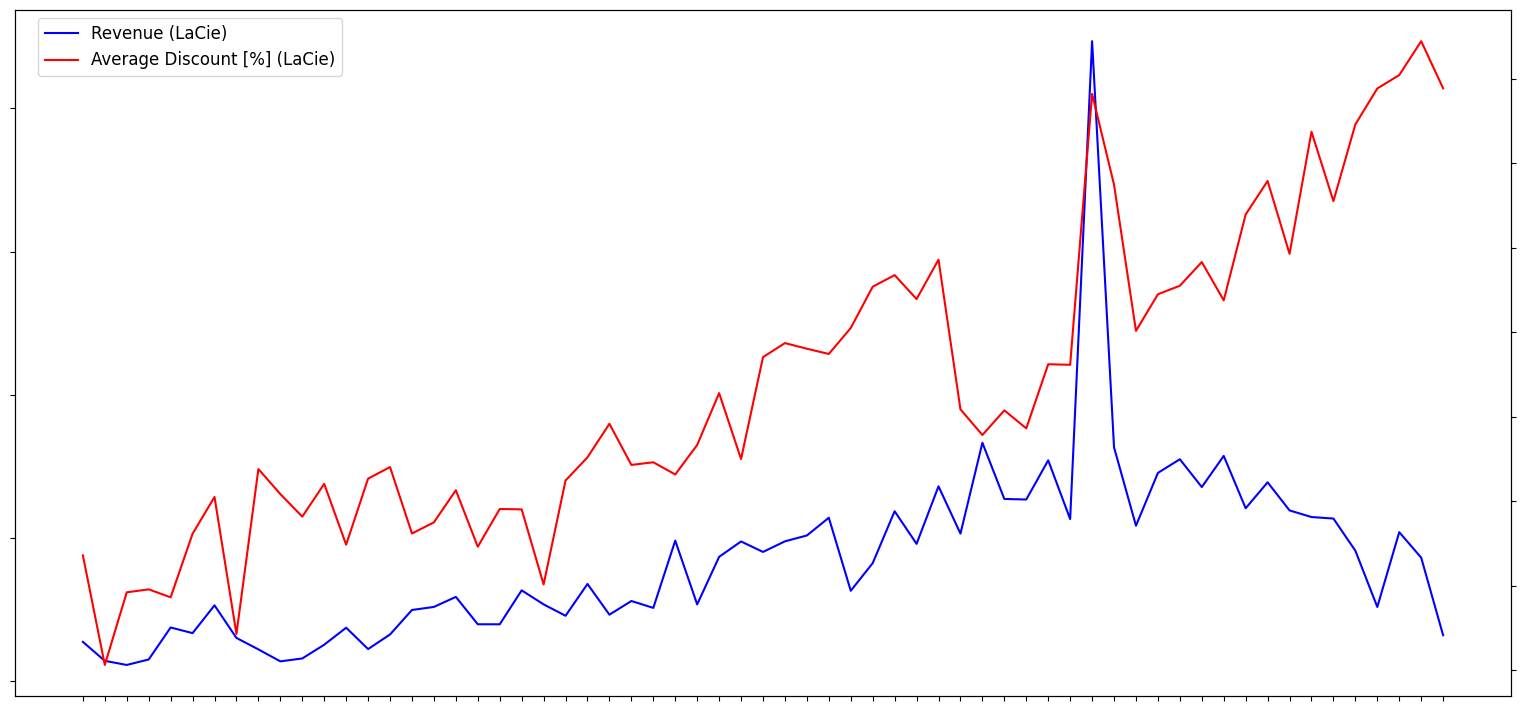

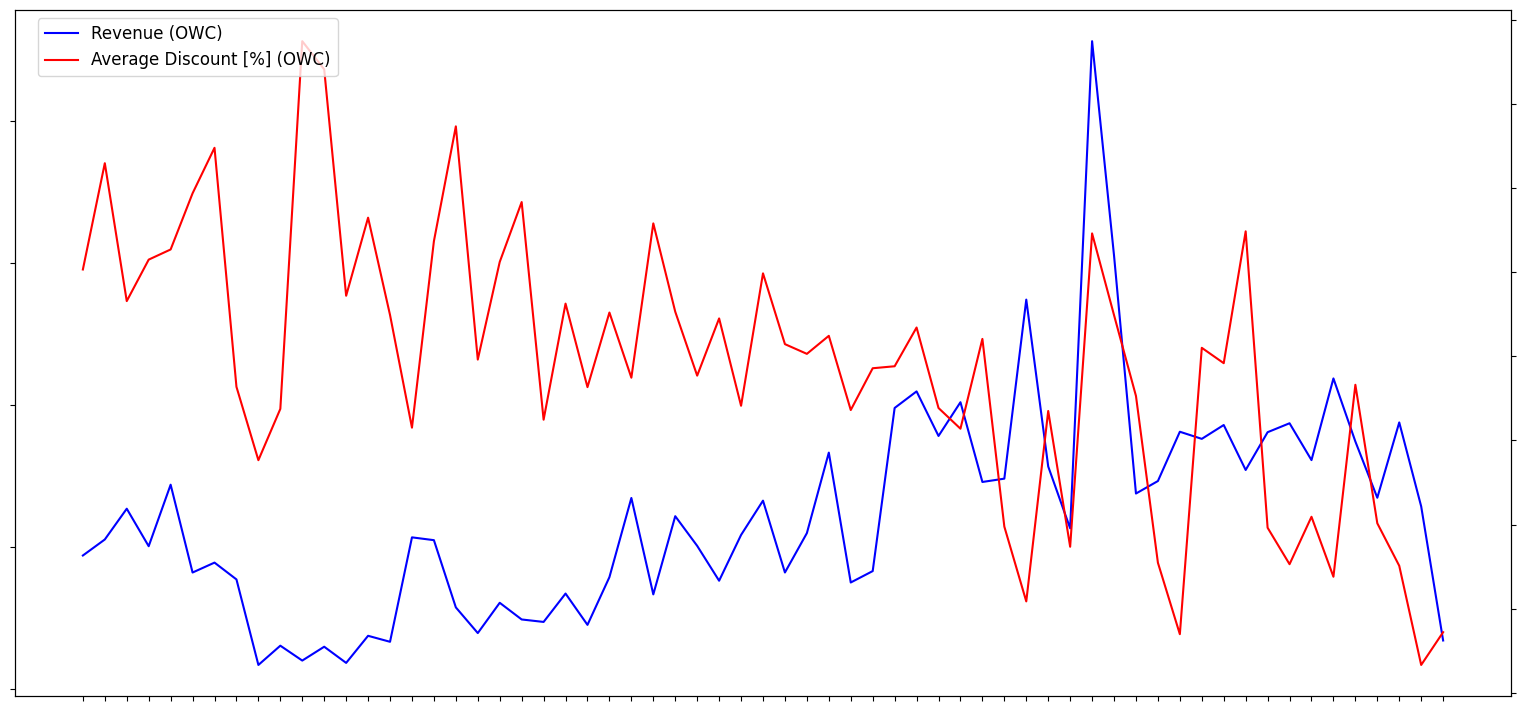

In [37]:
brand_list = ['Apple', 'LaCie', 'OWC']

for i in brand_list:

    create_plot(gogogo(i), 'long', clean=True)

# Show the plot
plt.show()

Brands that had overall revenue decline:

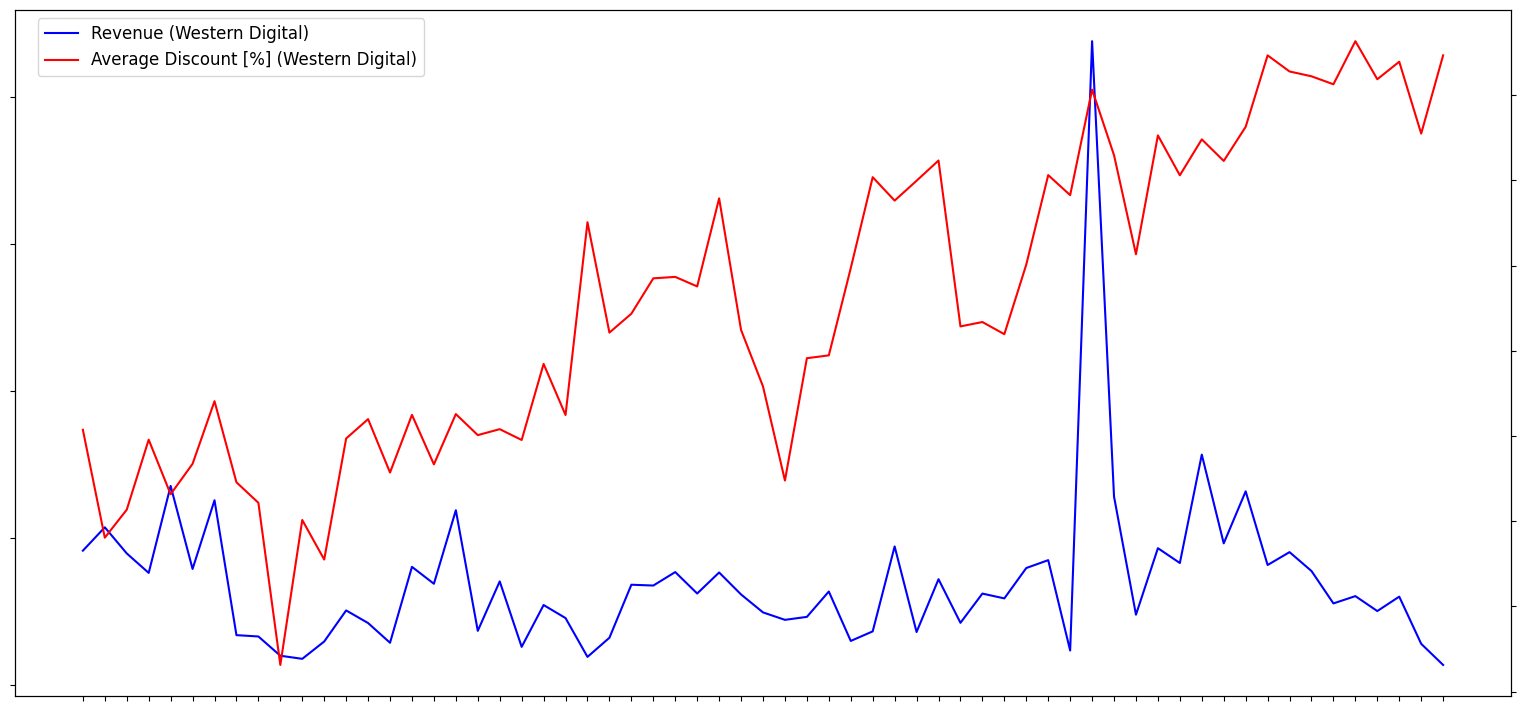

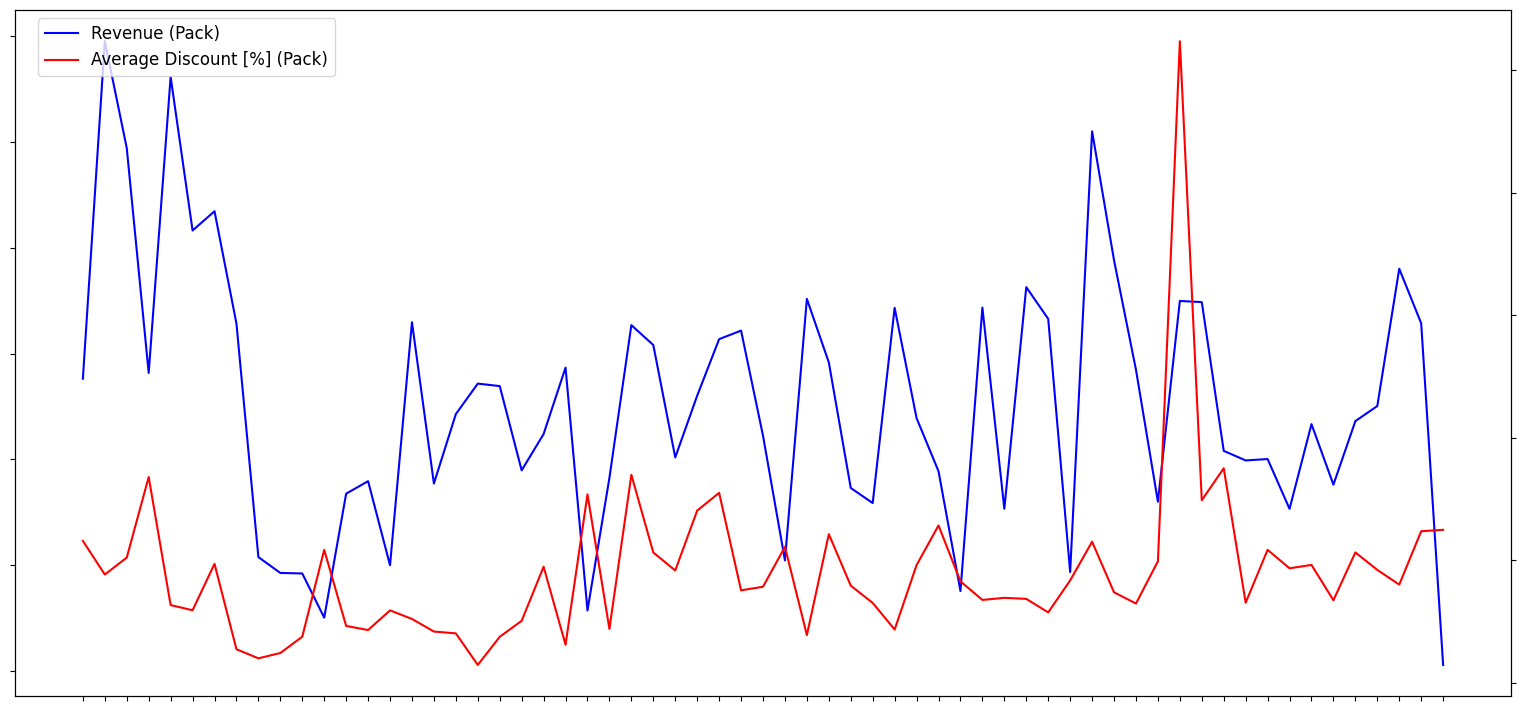

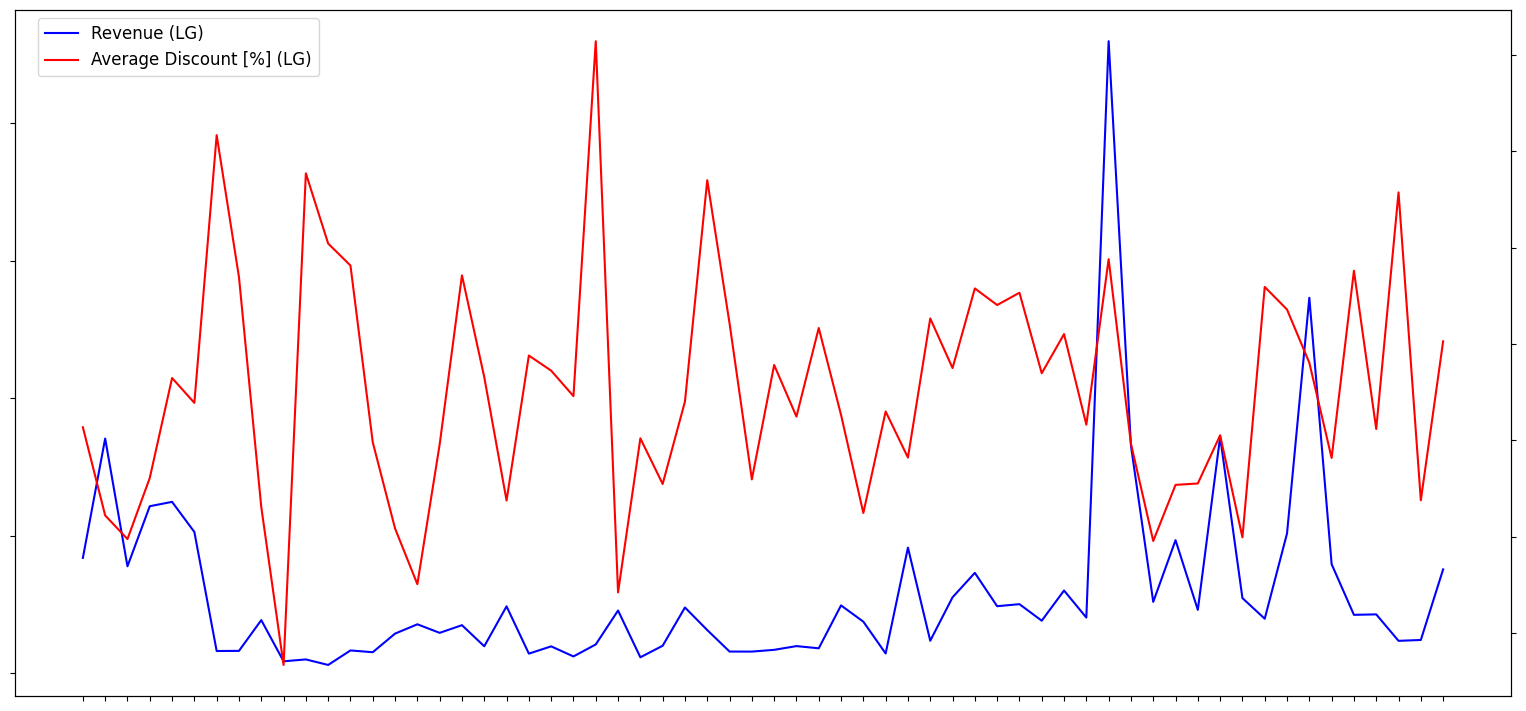

In [38]:
brand_list = ['Western Digital', 'Pack', 'LG']

for i in brand_list:

    create_plot(gogogo(i), 'long', clean=True)

# Show the plot
plt.show()

# Category Creation

In [39]:
product_category_df = products_cl.copy()

Create category df and column

In [40]:
product_category_df["category"] = ""

Categories:

In [41]:
product_category_df["category"] = ""
product_category_df.loc[
    (product_category_df["name"].str.contains("^.{0,7}apple iphone", case=False))
    |(product_category_df["desc"].str.contains("^.{0,7}apple iphone", case=False)), "category"] +=", smartphone"
product_category_df.loc[
    (product_category_df["name"].str.contains("^.{0,7}apple ipod", case=False))
    |(product_category_df["desc"].str.contains("^.{0,7}apple ipod", case=False)), "category"] +=", ipod"
product_category_df.loc[
    (product_category_df["name"].str.contains("^.{0,7}apple imac|mac mini|mac pro", case=False))
    |(product_category_df["desc"].str.contains("^.{0,7}apple imac|mac mini|mac pro", case=False)), "category"] +=", desktop"
product_category_df.loc[
    (product_category_df["name"].str.contains("^.{0,7}apple ipad", case=False))
    |(product_category_df["desc"].str.contains("^.{0,7}apple ipad", case=False)), "category"] +=", tablet"
product_category_df.loc[
    (product_category_df["name"].str.contains("tablet", case=False))
    |(product_category_df["desc"].str.contains("tablet", case=False)), "category"] +=", tablet"
product_category_df.loc[
    (product_category_df["name"].str.contains("backpack", case=False))
    |(product_category_df["desc"].str.contains("backpack", case=False)), "category"] +=", backpack"
product_category_df.loc[
    (product_category_df["name"].str.contains("^.{0,7}apple macbook|macbook", case=False))
    |(product_category_df["desc"].str.contains("^.{0,7}apple macbook|macbook", case=False)), "category"] +=", laptop"
product_category_df.loc[
    (product_category_df["name"].str.contains("server|nas", case=False))
    |(product_category_df["desc"].str.contains("server|nas", case=False)), "category"] +=", server"
product_category_df.loc[
    (product_category_df["name"].str.contains("drive|disk|SSD|HDD|memory|ram|raid", case=False))
    |(product_category_df["desc"].str.contains("drive|disk|SSD|HDD|memory|ram|raid", case=False)), "category"] +=", Datastorage"
product_category_df.loc[
    (product_category_df["name"].str.contains("watch", case=False))
    |(product_category_df["desc"].str.contains("watch", case=False)), "category"] +=", watch"
product_category_df.loc[
    (product_category_df["name"].str.contains("repair", case=False))
    |(product_category_df["desc"].str.contains("repair", case=False))
    |(product_category_df["sku"].str.contains("^rep", case=False)), "category"] +=", repair service"
product_category_df.loc[
    (product_category_df["desc"].str.contains("second hand", case=False))
    |(product_category_df["name"].str.contains("second hand", case=False))
    |(product_category_df["sku"].str.contains("^ap2", case=False)), "category"] +=", 2nd hand apples"
product_category_df.loc[
    (product_category_df["name"].str.contains("router", case=False))
    |(product_category_df["desc"].str.contains("router", case=False)), "category"] +=", router"
product_category_df.loc[
    (product_category_df["name"].str.contains("speaker|audio|headphones", case=False))
    |(product_category_df["desc"].str.contains("speaker|audio|headphones", case=False)), "category"] +=", audio"
product_category_df.loc[
    (product_category_df["name"].str.contains("cable|charg.|battery|outlet|power", case=False))
    |(product_category_df["desc"].str.contains("cable|charg.|battery|outlet|power", case=False)), "category"] +=", Power"
product_category_df.loc[
    (product_category_df["name"].str.contains("smart", case=False))
    |(product_category_df["desc"].str.contains("smart", case=False)), "category"] +=", smart devices"
product_category_df.loc[
    (product_category_df["name"].str.contains("keyboard", case=False))
    |(product_category_df["desc"].str.contains("keyboard", case=False)), "category"] +=", keyboard"
product_category_df.loc[
    (product_category_df["name"].str.contains("mouse", case=False))
    |(product_category_df["desc"].str.contains("mouse", case=False)), "category"] +=", mouse"
product_category_df.loc[
    (product_category_df["name"].str.contains("card", case=False))
    |(product_category_df["desc"].str.contains("card", case=False)), "category"] +=", card"
product_category_df.loc[
    (product_category_df["name"].str.contains("monitor", case=False))
    |(product_category_df["desc"].str.contains("monitor", case=False)), "category"] +=", monitor"
product_category_df.loc[
    (product_category_df["name"].str.contains("adapter|hub|switch", case=False))
    |(product_category_df["desc"].str.contains("adapter|hub|switch", case=False)), "category"] +=", connector"
product_category_df.loc[
    (product_category_df["name"].str.contains("cover|protector|case", case=False))
    |(product_category_df["desc"].str.contains("cover|protector|case", case=False)), "category"] +=", protection"
product_category_df.loc[
    (product_category_df["name"].str.contains("light|bulb", case=False))
    |(product_category_df["desc"].str.contains("light|bulb", case=False)), "category"] +=", light"
product_category_df.loc[
    (product_category_df["name"].str.contains("licence|service", case=False))
    |(product_category_df["desc"].str.contains("licence|service", case=False)), "category"] +=", licence,service"
product_category_df.loc[
    (product_category_df["name"].str.contains("key", case=False))
    |(product_category_df["desc"].str.contains("key", case=False)), "category"] +=", key"
product_category_df.loc[
    (product_category_df["name"].str.contains("\bpen\b", case=False,regex=True))
    |(product_category_df["desc"].str.contains("\bpen\b", case=False,regex=True)), "category"] +=", pen"
product_category_df.loc[
    (product_category_df["name"].str.contains("locator", case=False))
    |(product_category_df["desc"].str.contains("locator", case=False)), "category"] +=", locator"
product_category_df.loc[
    (product_category_df["name"].str.contains("camera|video recorder", case=False))
    |(product_category_df["desc"].str.contains("camera|video recorder", case=False)), "category"] +=", camera"
product_category_df.loc[
    (product_category_df["name"].str.contains("drone|flypad|cuadricóptero", case=False))
    |(product_category_df["desc"].str.contains("drone|flypad|cuadricóptero", case=False)), "category"] +=", drone"
product_category_df.loc[
    (product_category_df["name"].str.contains("game", case=False))
    |(product_category_df["desc"].str.contains("game", case=False)), "category"] +=", gaming"
product_category_df.loc[
    (product_category_df["name"].str.contains("stand", case=False))
    |(product_category_df["desc"].str.contains("stand", case=False)), "category"] +=", stands"
product_category_df.loc[
    (product_category_df["name"].str.contains("bracelet|gloves|socks|hat|undies|glasses", case=False))
    |(product_category_df["desc"].str.contains("bracelet|gloves|socks|hat|undies|glasses", case=False)), "category"] +=", wearables"
product_category_df.loc[product_category_df["category"] == "",["category"]] = ", other"
# product_category_df.sample(20)
product_category_df["category"].value_counts().loc[product_category_df["category"].value_counts()>100]
product_category_df["category"].value_counts().nlargest(25)
# product_category_df.groupby("category").sum("price").nlargest(25, columns="price")

category
, protection                         1130
, Datastorage                        1045
, desktop, Datastorage                750
, server, Datastorage                 650
, other                               613
, laptop, Datastorage                 567
, Power                               319
, laptop, protection                  253
, tablet                              223
, server                              210
, audio                               205
, monitor                             190
, connector                           157
, smartphone                          153
, watch                               136
, Power, light                        119
, smartphone, protection              117
, watch, protection                    98
, Datastorage, light                   96
, 2nd hand apples                      85
, laptop                               83
, laptop, Power                        83
, smartphone, 2nd hand apples          81
, repair service, licence

In [42]:
sku_good_merge_cat = pd.merge(sku_good_merge_iqr, product_category_df[['sku', 'type', 'category']], on="sku", how="left")
sku_good_merge_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67359 entries, 0 to 67358
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             67359 non-null  int64         
 1   date              67359 non-null  datetime64[ns]
 2   sku               67359 non-null  object        
 3   name              67359 non-null  object        
 4   desc              67359 non-null  object        
 5   price             67359 non-null  float64       
 6   in_stock          67359 non-null  int64         
 7   id_order          67359 non-null  int64         
 8   product_quantity  67359 non-null  int64         
 9   unit_price        67359 non-null  float64       
 10  price_diff        67359 non-null  float64       
 11  %price_diff       67359 non-null  float64       
 12  revenue           67359 non-null  float64       
 13  type              67339 non-null  object        
 14  category          6735

In [43]:
category_rev = sku_good_merge_cat.groupby("category").agg({"revenue":"sum", "%price_diff":"mean","price_diff":"mean","product_quantity":"sum", 'date': 'first'}).sort_values("revenue", ascending=False).reset_index()
category_rev

,category,revenue,%price_diff,price_diff,product_quantity,date
0,", smartphone",2496852.92,-6.072198,-32.495596,3834,2017-08-11 12:34:57
1,", Datastorage",1487328.39,-16.695073,-22.849598,11050,2017-02-12 16:27:17
2,", tablet",820789.73,-13.501870,-27.526257,2743,2017-01-01 12:31:41
3,", server, Datastorage",540949.66,-14.231923,-28.180998,2581,2017-01-01 21:30:29
4,", other",380453.47,-21.904136,-15.874804,5757,2017-02-17 18:46:24
...,...,...,...,...,...,...
237,", audio, stands",31.34,-5.001516,-1.650000,1,2018-01-21 01:49:09
238,", watch, protection, stands",28.49,-48.190580,-26.500000,1,2017-01-15 23:41:18
239,", watch, 2nd hand apples, Power",26.78,-40.488889,-18.220000,1,2017-11-21 08:32:47
240,", laptop, 2nd hand apples, connector",24.99,-28.600000,-10.010000,1,2017-11-07 10:44:53


In [44]:
def gogo_cat(category):
    discounts_weekly = sku_good_merge_cat.loc[sku_good_merge_cat['category'] == category].groupby(
        [sku_good_merge_cat['date'].dt.isocalendar().year,
         sku_good_merge_cat['date'].dt.isocalendar().week]).agg(
        {'revenue': "sum", '%price_diff': "mean", 'category': 'first'}).reset_index()
    try:
        discounts_weekly.drop(0, axis=0, inplace=True)
    except KeyError:
        pass

    discounts_weekly['%price_diff'] = discounts_weekly['%price_diff'] * (-1)
    discounts_weekly['week-year'] = discounts_weekly['year'].astype(str) + "-" + discounts_weekly['week'].astype(str)
    # discounts_weekly.sample(3)
    return discounts_weekly

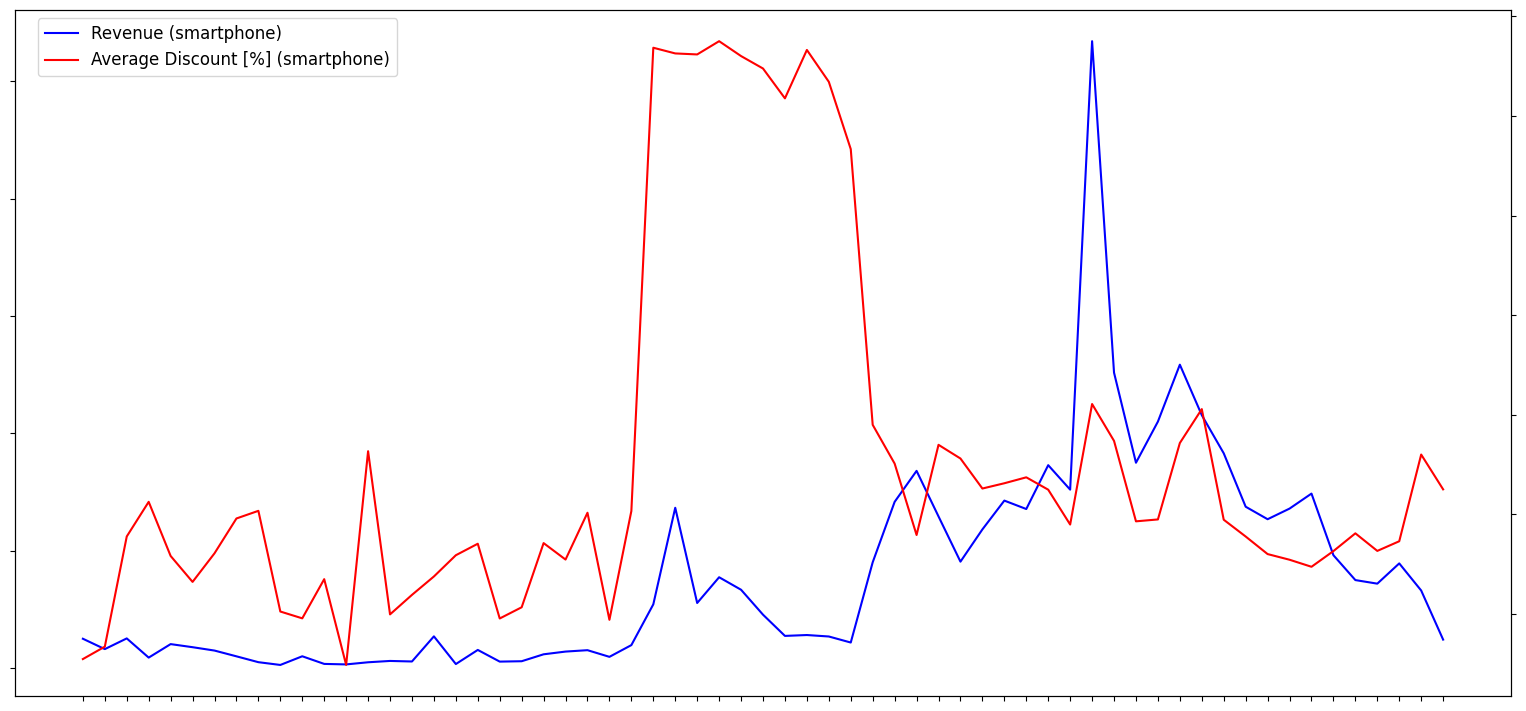

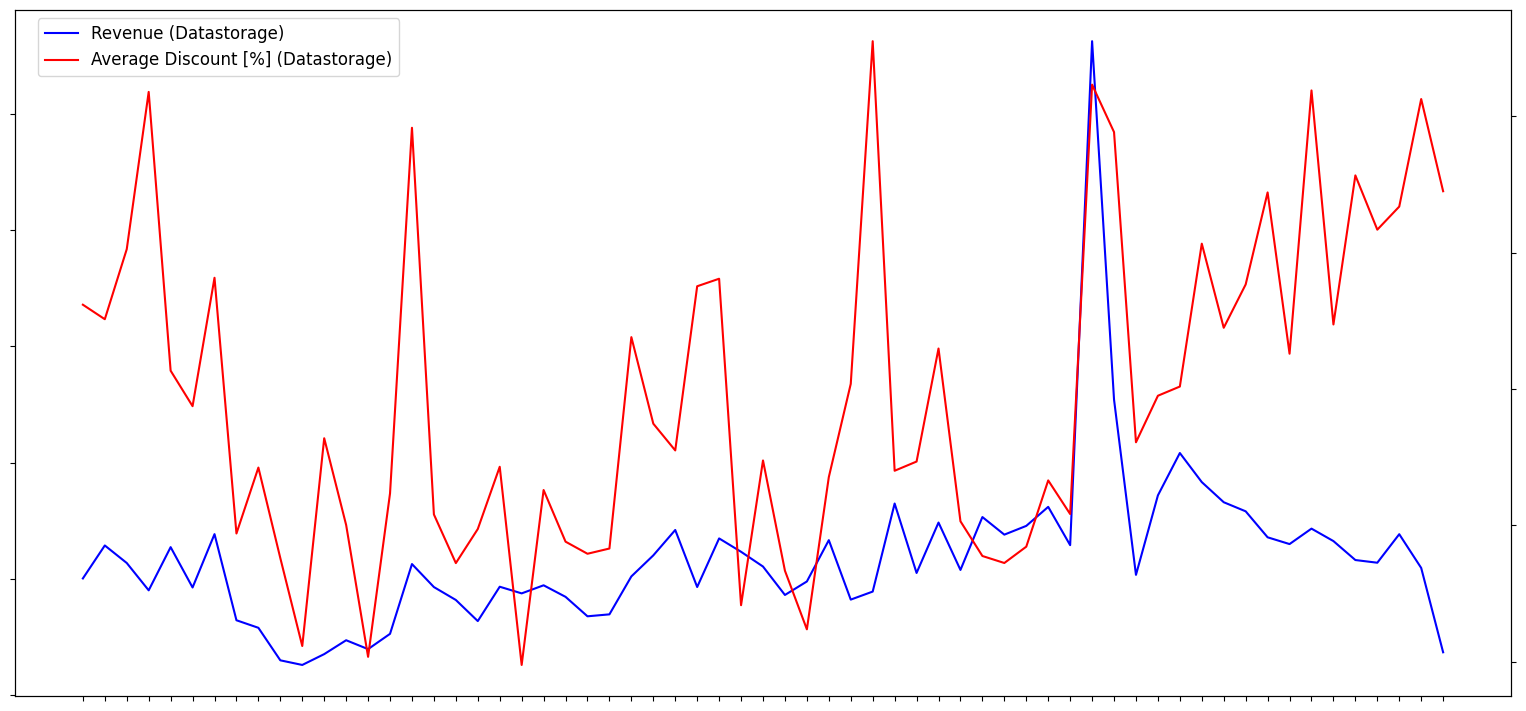

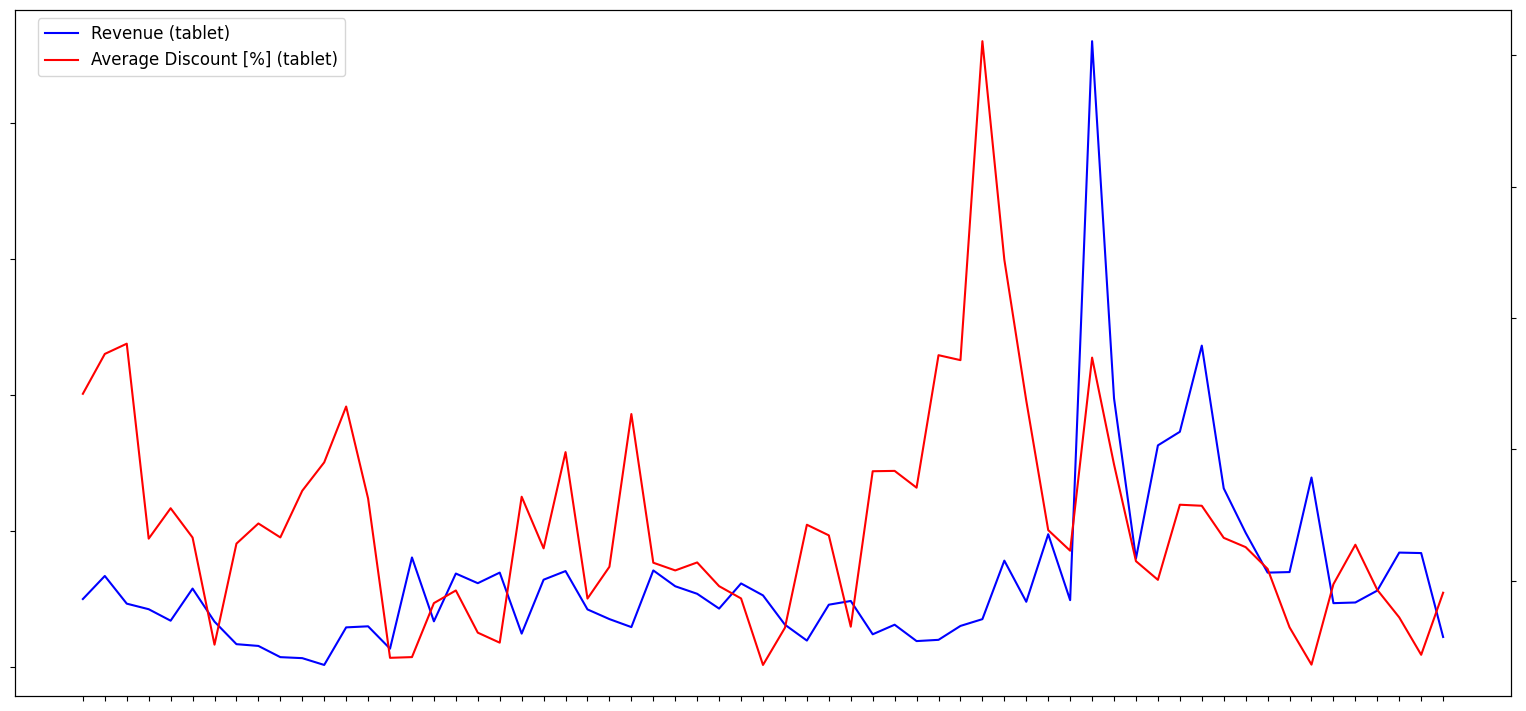

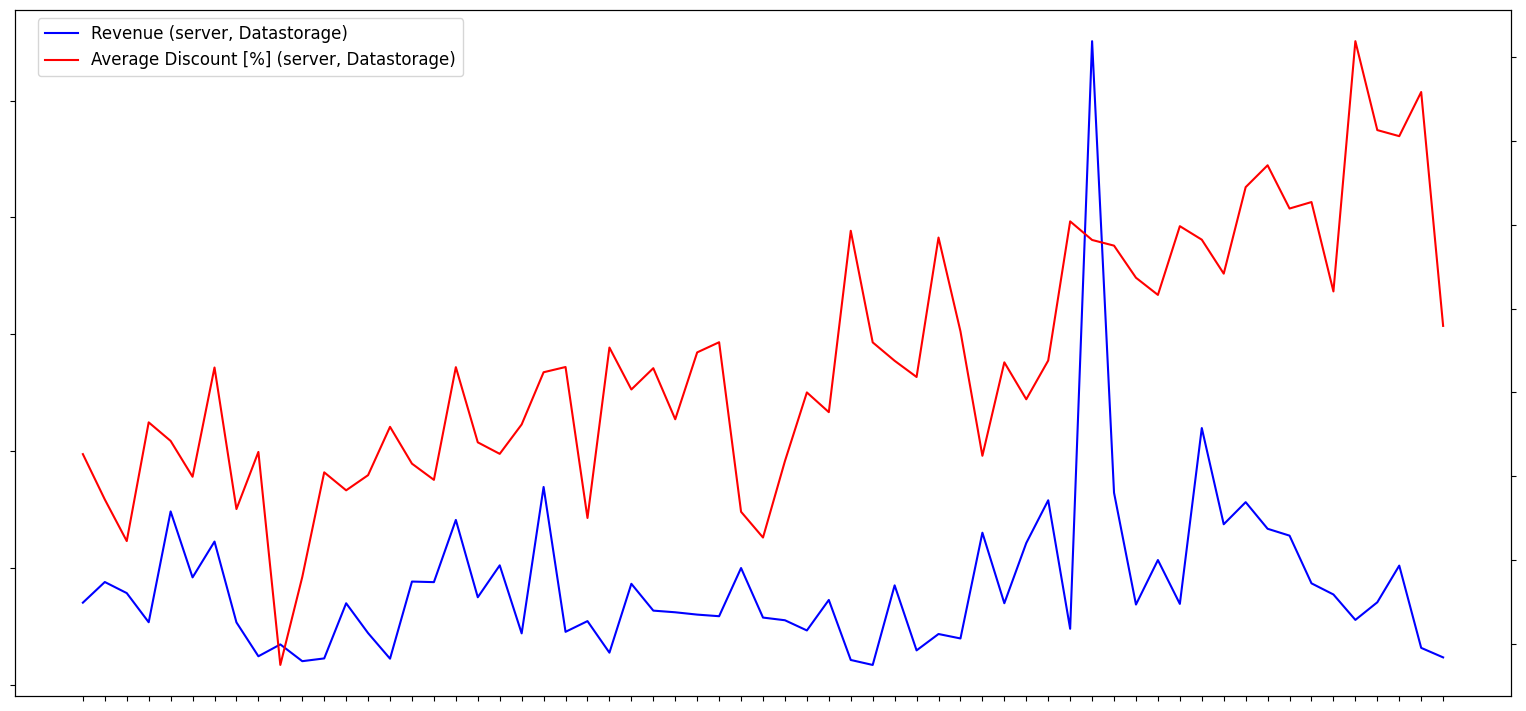

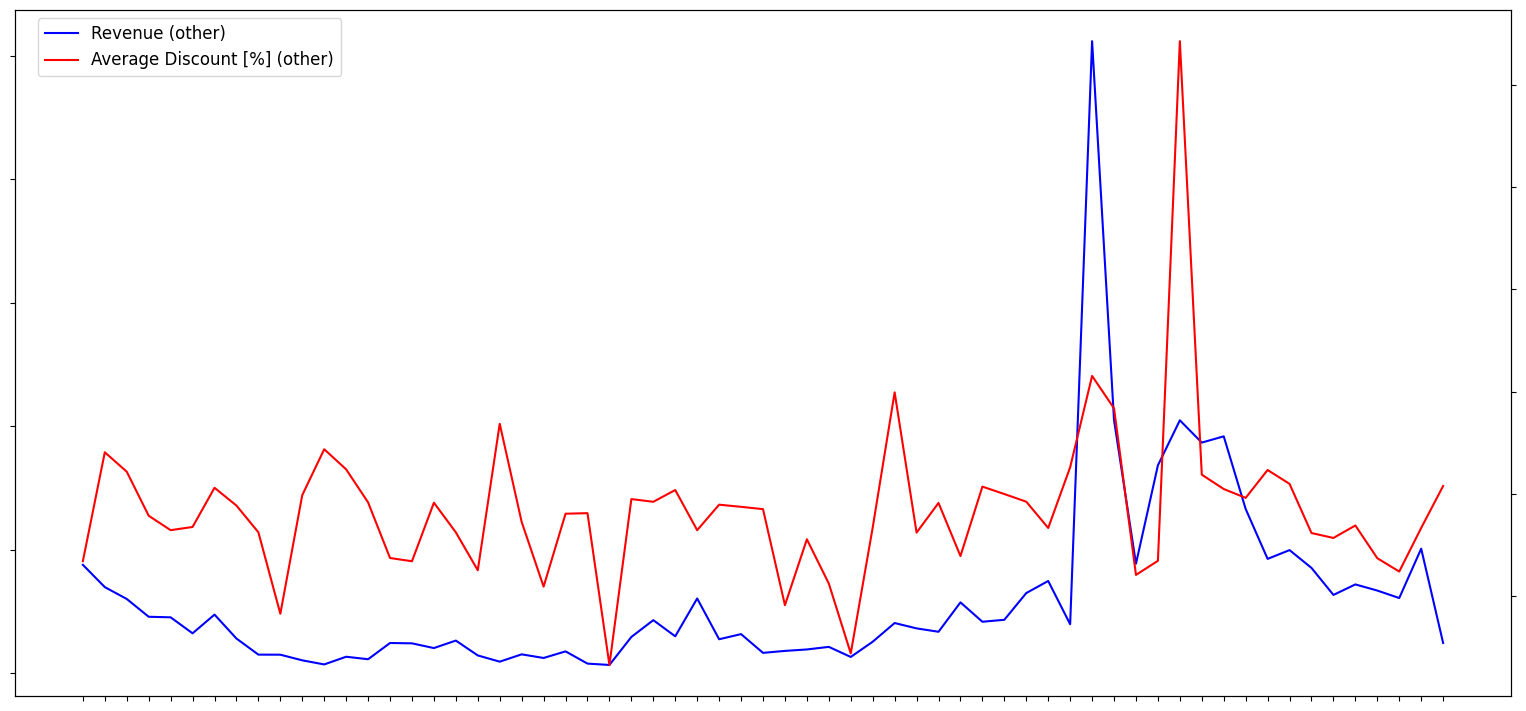

In [45]:
number_of_categories = 5
category_list = category_rev.groupby("category").sum('revenue').nlargest(number_of_categories, columns="revenue").reset_index()
category_list = category_list['category'].to_list()

for i in category_list:
    create_plot(gogo_cat(i), 'category', i[2:], clean=True)

# Show the plot
plt.show()

# Price classification of products

In [46]:
sku_good_merge_cat.head(1)

,index,date,sku,name,desc,price,in_stock,id_order,product_quantity,unit_price,price_diff,%price_diff,revenue,type,category
0,0,2017-01-02 13:34:30,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,300551,1,54.99,-5.0,-8.334722,54.99,8696,", laptop, stands"


In [47]:
Q1 = sku_good_merge_cat["price"].quantile(0.25)
Q2 = sku_good_merge_cat["price"].median()
Q3 = sku_good_merge_cat["price"].quantile(0.75)
print(Q1, Q2, Q3)

35.0 79.99 169.99


In [48]:
Q1_df = sku_good_merge_cat.loc[sku_good_merge_cat["price"] < Q1].sort_values("price", ascending=False).reset_index()
Q2_df = sku_good_merge_cat.loc[sku_good_merge_cat["price"].between(Q1, Q2)].sort_values("price", ascending=False).reset_index()
Q3_df = sku_good_merge_cat.loc[sku_good_merge_cat["price"].between(Q2+0.01, Q3)].sort_values("price", ascending=False).reset_index()
Q4_df = sku_good_merge_cat.loc[sku_good_merge_cat["price"] > Q3].sort_values("price", ascending=False).reset_index()
Q4_df.head()
Q = pd.concat([Q1_df, Q2_df, Q3_df, Q4_df], ignore_index=True)
Q.info()
sku_good_merge_cat.info()
print(Q1_df['price'].max(), Q2_df['price'].min(), Q2_df['price'].max(), Q3_df['price'].min(), Q3_df['price'].max(), Q4_df['price'].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67359 entries, 0 to 67358
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           67359 non-null  int64         
 1   index             67359 non-null  int64         
 2   date              67359 non-null  datetime64[ns]
 3   sku               67359 non-null  object        
 4   name              67359 non-null  object        
 5   desc              67359 non-null  object        
 6   price             67359 non-null  float64       
 7   in_stock          67359 non-null  int64         
 8   id_order          67359 non-null  int64         
 9   product_quantity  67359 non-null  int64         
 10  unit_price        67359 non-null  float64       
 11  price_diff        67359 non-null  float64       
 12  %price_diff       67359 non-null  float64       
 13  revenue           67359 non-null  float64       
 14  type              6733

In [49]:
def gogo_price_cat(df):
    discounts_weekly = df.groupby(
        [df['date'].dt.isocalendar().year,
         df['date'].dt.isocalendar().week]).agg(
        {'revenue': "sum", '%price_diff': "mean", 'category': 'first'}).reset_index()
    try:
        discounts_weekly.drop(0, axis=0, inplace=True)
    except KeyError:
        pass

    discounts_weekly['%price_diff'] = discounts_weekly['%price_diff'] * (-1)
    discounts_weekly['week-year'] = discounts_weekly['year'].astype(str) + "-" + discounts_weekly['week'].astype(str)
    # discounts_weekly.sample(3)
    return discounts_weekly

In [50]:
gogo_cat(Q1_df)

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [ ]:
q_dataframes = [Q1_df, Q2_df, Q3_df, Q4_df]
q_df_names = ['Q1', 'Q2', 'Q3', 'Q4']
counter = 0

for i in q_dataframes:
    create_plot(gogo_cat(i), 'quantiles', clean=True, q_df_name=q_df_names[counter])
    counter += 1

# Show the plot
plt.show()

# products sold vs discounts


In [ ]:
# discounts_weekly = sku_good_merge_iqr['%price_diff'].resample('W').mean()
discounts_weekly = sku_good_merge_iqr.groupby([sku_good_merge_iqr['date'].dt.isocalendar().year,
                                        sku_good_merge_iqr['date'].dt.isocalendar().week]).agg({"%price_diff":"mean","product_quantity":"sum"}).reset_index()
discounts_weekly['%price_diff'] = discounts_weekly['%price_diff'] * (-1)
discounts_weekly.drop(0, axis=0, inplace=True)
discounts_weekly['week-year'] = discounts_weekly['year'].astype(str) + "-" + discounts_weekly['week'].astype(str)
discounts_weekly
create_plot(discounts_weekly, mode="products", clean=True)

# total rev remake

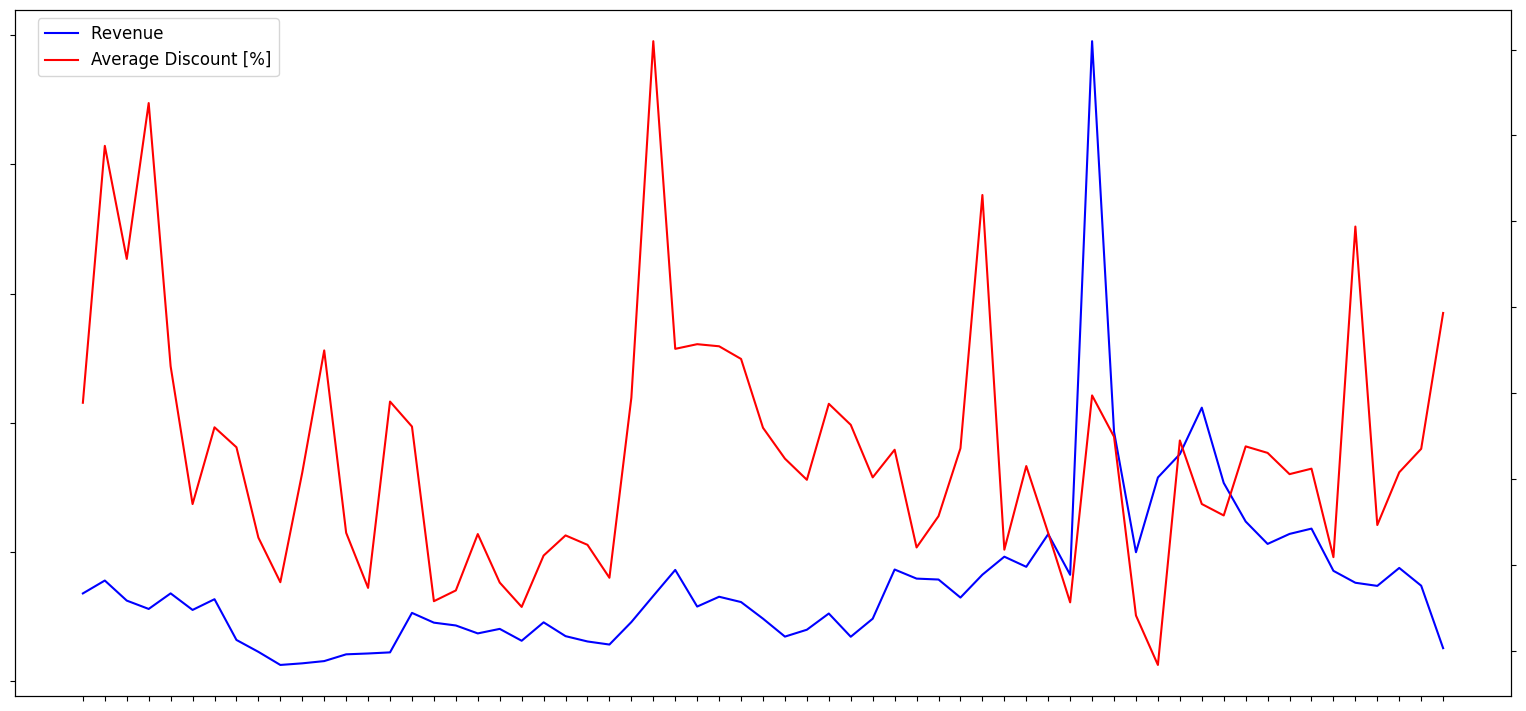

In [73]:
# discounts_weekly = sku_good_merge_iqr['%price_diff'].resample('W').mean()
discounts_weekly = sku_good_merge_iqr.groupby([sku_good_merge_iqr['date'].dt.isocalendar().year,
                                        sku_good_merge_iqr['date'].dt.isocalendar().week]).agg({"%price_diff":"mean","revenue":"sum"}).reset_index()
discounts_weekly['%price_diff'] = discounts_weekly['%price_diff'] * (-1)
discounts_weekly.drop(0, axis=0, inplace=True)
discounts_weekly['week-year'] = discounts_weekly['year'].astype(str) + "-" + discounts_weekly['week'].astype(str)
discounts_weekly
create_plot(discounts_weekly, mode="rev", clean=True)

# Check correlation between %discount and revenue (warning: it's crap!)

In [ ]:
corr_check = sku_good_merge_cat.groupby("category").agg({"revenue":"mean", "%price_diff":"mean","price_diff":"mean","product_quantity":"sum"}).sort_values("revenue", ascending=False).reset_index()
corr_check.head(3)

In [ ]:
category_rev.nlargest(5, columns="revenue")

In [ ]:
sku_good_merge_cat.head(5)

In [ ]:
corr_check.rename(columns={'revenue': 'mean_cat_revenue', "%price_diff": "mean_cat_%price_diff", "price_diff": "mean_cat_price_diff"}, inplace=True)
corr_check.head(1)

In [ ]:
sku_good_merge_cat = pd.merge(sku_good_merge_cat, corr_check, on="category", how="left")
sku_good_merge_cat.head(1)

In [ ]:
sku_good_merge_cat["rev_rel"] = sku_good_merge_cat["revenue"] / sku_good_merge_cat["mean_cat_revenue"]
sku_good_merge_cat["disc_rel"] = sku_good_merge_cat["%price_diff"] / sku_good_merge_cat["mean_cat_%price_diff"]
sku_good_merge_cat["short"] = sku_good_merge_cat["sku"].str[:3]
sku_good_merge_cat = pd.merge(sku_good_merge_cat, brands_cl, on="short", how="left")
sku_good_merge_cat.head(50)

In [ ]:
df_container = []
for category in category_list:
    df = sku_good_merge_cat[sku_good_merge_cat['category'] == category].groupby('short')['revenue'].sum()
    df_top5 = df.nlargest(5).reset_index()
    df_container.append(df_top5["short"].tolist())
df_container

In [ ]:
import numpy as np

In [ ]:
def prepare_data(df, category, brands):
    """
    Prepare data for given brands in a category.
    """
    category_data = df[df['category'] == category]
    filtered_data = category_data[category_data['short'].isin(brands)]# .groupby('short').agg({'revenue': 'sum', '%price_diff': 'mean', 'category': 'first', 'disc_rel': 'mean'}).reset_index()
    return filtered_data

def plot_data_for_brands(df, category, brands):
    """
    Create separate plots for each brand in a list of brands.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Calculate the area for the angle bisector
    combined = pd.concat([df['disc_rel'], df['rev_rel']])
    lims_x = [0, np.max(df['disc_rel'])]
    lims_y = [0, np.max(df['rev_rel'])]

    # Draw each brand and add an equalisation line
    for brand in brands:
        brand_data = df[df['short'] == brand]
        sns.scatterplot(data=brand_data, x='disc_rel', y='rev_rel', ax=ax, label=brand)
        sns.regplot(data=brand_data, x='disc_rel', y='rev_rel', ax=ax, scatter=False, color='grey') # Regression line

    # Draw angle bisector (x=y)
    ax.plot(lims_x, lims_y, 'k--', alpha=0.75, zorder=0, label='x=y') # Angle bisector

    plt.title(f'Relative Revenue vs. Relative Discount for {category}')
    plt.xlabel('Relative Discount')
    plt.ylabel('Relative Revenue')
    plt.legend(title='Brands')
    plt.xlim(lims_x)
    plt.ylim(lims_y)
    plt.grid(True)
    plt.show()

# Assuming category_list and df_container are defined as described above
for category, brands in zip(category_list, df_container):
    filtered_data = prepare_data(sku_good_merge_cat, category, brands)
    plot_data_for_brands(filtered_data, category, brands)

Exclude Christmas sale data and compare

In [ ]:
for category, brands in zip(category_list, df_container):
    filtered_data = prepare_data(sku_good_merge_cat.loc[~(sku_good_merge_cat['week-year'].isin(['2017-45', '2017-46', '2017-47', '2017-48', '2017-49', '2017-50']))], category, brands)
    plot_data_for_brands(filtered_data, category, brands)

In [ ]:
def calculate_brand_metrics(df):
    # Gruppiere nach Kategorie und Marke und berechne die Summe der Umsätze sowie den durchschnittlichen Rabatt pro Marke
    brand_revenue = df.groupby(['category', 'short']).agg(
        total_revenue=('revenue', 'sum'),
        avg_discount_per_brand=('%price_diff', 'mean')
    ).reset_index()

    # Berechne den Gesamtdurchschnitt der Umsätze pro Kategorie
    category_avg_revenue = brand_revenue.groupby('category')['total_revenue'].mean().reset_index()
    category_avg_revenue.rename(columns={'total_revenue': 'avg_revenue_per_category'}, inplace=True)

    # Füge den Durchschnitt der Kategorie zu den Markendaten hinzu
    brand_metrics = pd.merge(brand_revenue, category_avg_revenue, on='category')

    # Berechne den relativen Umsatz pro Marke
    brand_metrics['rev_rel'] = brand_metrics['total_revenue'] / brand_metrics['avg_revenue_per_category']

    # Berechne die durchschnittlichen Rabatte pro Artikel in den Kategorien
    avg_discount_per_article = df.groupby(['category', 'sku']).agg(
        avg_discount_per_article=('%price_diff', 'mean')
    ).groupby('category').mean().reset_index()

    # Füge die durchschnittlichen Rabatte pro Artikel zu den Brand-Metrics hinzu
    brand_metrics = pd.merge(brand_metrics, avg_discount_per_article, on='category')

    # Berechne das Verhältnis der durchschnittlichen Rabatte pro Brand zu den durchschnittlichen Rabatten pro Artikel
    brand_metrics['disc_rel'] = brand_metrics['avg_discount_per_brand'] / brand_metrics['avg_discount_per_article']

    return brand_metrics

# Beispiel-Daten laden (Annahme: dein DataFrame heißt 'sku_good_merge_cat')
# sku_good_merge_cat = pd.read_csv('path_to_your_data.csv')

# Berechnung der Metriken
brand_metrics = calculate_brand_metrics(sku_good_merge_cat)

# Zeige die Ergebnisse
print(brand_metrics)

# display correlation between amount of discount and (revenue or product quantity or number of orders) (per month)
- Calculate revenue per week/month
-

# to dos
* remove outliers via IQR ✅

# ideas
* chunk data in timeslots and compare sales and discounts via plots
* group by categories

# will be covered
* category creation
* plotting library seaborne workshop


